AVACADO PROJECT
Project Description
This data was downloaded from the Hass Avocado Board website in May of 2018 & compiled into a single CSV.  The table below represents weekly 2018 retail scan data for National retail volume (units) and price. Retail scan data comes directly from retailers’ cash registers based on actual retail sales of Hass avocados.  Starting in 2013, the table below reflects an expanded, multi-outlet retail data set. Multi-outlet reporting includes an aggregation of the following channels: grocery, mass, club, drug, dollar and military. The Average Price (of avocados) in the table reflects a per unit (per avocado) cost, even when multiple units (avocados) are sold in bags.  The Product Lookup codes (PLU’s) in the table are only for Hass avocados. Other varieties of avocados (e.g. greenskins) are not included in this table.

Some relevant columns in the dataset:

Date - The date of the observation
AveragePrice - the average price of a single avocado
type - conventional or organic
year - the year
Region - the city or region of the observation
Total Volume - Total number of avocados sold
4046 - Total number of avocados with PLU 4046 sold
4225 - Total number of avocados with PLU 4225 sold
4770 - Total number of avocados with PLU 4770 sold
Inspiration /Label
The dataset can be seen in two angles to find the region and find the average price.

Task: One of Classification and other of Regression .Do both tasks in the same .ipynb file and submit as single file. 

Dataset Link-
https://raw.githubusercontent.com/dsrscientist/Data-Science-ML-Capstone-Projects/master/avocado.csv 



In [4]:
#Importing necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
import scipy as stats

from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

#Regressor Algorithims
from sklearn.linear_model import LinearRegression, Lasso,Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor as KNN
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from sklearn import metrics

#Classification Algorithims
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,roc_auc_score,roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier,GradientBoostingClassifier

from sklearn.model_selection import GridSearchCV

%matplotlib inline
import warnings
warnings.filterwarnings('ignore')


In [5]:
#Importing Dataset
df=pd.read_csv("/Users/maha/Desktop/Avocado.csv")
df.head()

Unnamed: 0        Date  AveragePrice  Total Volume     4046       4225  \
0           0  2015-12-27          1.33      64236.62  1036.74   54454.85   
1           1  2015-12-20          1.35      54876.98   674.28   44638.81   
2           2  2015-12-13          0.93     118220.22   794.70  109149.67   
3           3  2015-12-06          1.08      78992.15  1132.00   71976.41   
4           4  2015-11-29          1.28      51039.60   941.48   43838.39   

     4770  Total Bags  Small Bags  Large Bags  XLarge Bags          type  \
0   48.16     8696.87     8603.62       93.25          0.0  conventional   
1   58.33     9505.56     9408.07       97.49          0.0  conventional   
2  130.50     8145.35     8042.21      103.14          0.0  conventional   
3   72.58     5811.16     5677.40      133.76          0.0  conventional   
4   75.78     6183.95     5986.26      197.69          0.0  conventional   

   year  region  
0  2015  Albany  
1  2015  Albany  
2  2015  Albany  
3  2015  Albany  
4  2015  Albany

In [6]:
#EXPLORATORY VIEW ANALYSIS
df.columns

Index(['Unnamed: 0', 'Date', 'AveragePrice', 'Total Volume', '4046', '4225',
       '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type',
       'year', 'region'],
      dtype='object')

In [7]:
df.shape

(18249, 14)

This dataset has 16468 rows and 14 columns.Out of which the variables AveragePrice and Region are considered as targets for different approaches, the remaining 12 are independent variables described in the above section Project Description.

Since the dataset can be seen from two angles to find the region(Classification problem) and the average price(Regression Problem) we are going to analyze AveragePrice and Region as target variables during the EDA.

In [8]:
#Dataset types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    18249 non-null  int64  
 1   Date          18249 non-null  object 
 2   AveragePrice  18249 non-null  float64
 3   Total Volume  18249 non-null  float64
 4   4046          18249 non-null  float64
 5   4225          18249 non-null  float64
 6   4770          18249 non-null  float64
 7   Total Bags    18249 non-null  float64
 8   Small Bags    18249 non-null  float64
 9   Large Bags    18249 non-null  float64
 10  XLarge Bags   18249 non-null  float64
 11  type          18249 non-null  object 
 12  year          18249 non-null  int64  
 13  region        18249 non-null  object 
dtypes: float64(9), int64(2), object(3)
memory usage: 1.9+ MB


The columns in the dataset contains two different types of data namely float and object data type. There are 3 columns having object data type that are categorical in nature which we need to process separately by using encoding methods.
The Dataset doesnt present null values.

In [9]:
# Dropping the irrelevant column Unnamed:0
df.drop("Unnamed: 0",axis=1, inplace=True)

In [10]:
df.head()

Date  AveragePrice  Total Volume     4046       4225    4770  \
0  2015-12-27          1.33      64236.62  1036.74   54454.85   48.16   
1  2015-12-20          1.35      54876.98   674.28   44638.81   58.33   
2  2015-12-13          0.93     118220.22   794.70  109149.67  130.50   
3  2015-12-06          1.08      78992.15  1132.00   71976.41   72.58   
4  2015-11-29          1.28      51039.60   941.48   43838.39   75.78   

   Total Bags  Small Bags  Large Bags  XLarge Bags          type  year  region  
0     8696.87     8603.62       93.25          0.0  conventional  2015  Albany  
1     9505.56     9408.07       97.49          0.0  conventional  2015  Albany  
2     8145.35     8042.21      103.14          0.0  conventional  2015  Albany  
3     5811.16     5677.40      133.76          0.0  conventional  2015  Albany  
4     6183.95     5986.26      197.69          0.0  conventional  2015  Albany

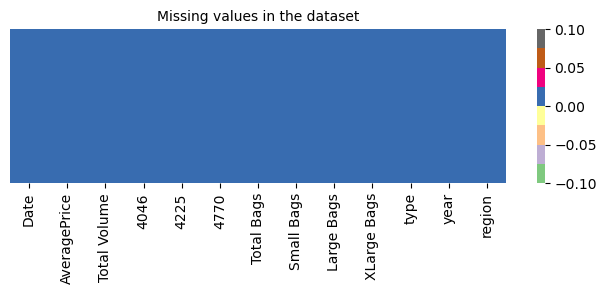

In [11]:
# Let's visualize it using heatmap to see any missing values are present.
plt.figure(figsize=(8,2))
sns.heatmap(df.isnull(), yticklabels=False,cmap="Accent")
plt.title('Missing values in the dataset', fontsize=10);

In [12]:
#Feature Engineering
# Changing date column from object type to Date Type
df['Date']=pd.to_datetime(df['Date'])

In [13]:
df.dtypes

Date            datetime64[ns]
AveragePrice           float64
Total Volume           float64
4046                   float64
4225                   float64
4770                   float64
Total Bags             float64
Small Bags             float64
Large Bags             float64
XLarge Bags            float64
type                    object
year                     int64
region                  object
dtype: object

In [14]:
df["Month"] = df["Date"].dt.month
df["Day"]=df["Date"].dt.day

In [15]:
df.head()


Date  AveragePrice  Total Volume     4046       4225    4770  \
0 2015-12-27          1.33      64236.62  1036.74   54454.85   48.16   
1 2015-12-20          1.35      54876.98   674.28   44638.81   58.33   
2 2015-12-13          0.93     118220.22   794.70  109149.67  130.50   
3 2015-12-06          1.08      78992.15  1132.00   71976.41   72.58   
4 2015-11-29          1.28      51039.60   941.48   43838.39   75.78   

   Total Bags  Small Bags  Large Bags  XLarge Bags          type  year  \
0     8696.87     8603.62       93.25          0.0  conventional  2015   
1     9505.56     9408.07       97.49          0.0  conventional  2015   
2     8145.35     8042.21      103.14          0.0  conventional  2015   
3     5811.16     5677.40      133.76          0.0  conventional  2015   
4     6183.95     5986.26      197.69          0.0  conventional  2015   

   region  Month  Day  
0  Albany     12   27  
1  Albany     12   20  
2  Albany     12   13  
3  Albany     12    6  
4  Albany     11   29

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          18249 non-null  datetime64[ns]
 1   AveragePrice  18249 non-null  float64       
 2   Total Volume  18249 non-null  float64       
 3   4046          18249 non-null  float64       
 4   4225          18249 non-null  float64       
 5   4770          18249 non-null  float64       
 6   Total Bags    18249 non-null  float64       
 7   Small Bags    18249 non-null  float64       
 8   Large Bags    18249 non-null  float64       
 9   XLarge Bags   18249 non-null  float64       
 10  type          18249 non-null  object        
 11  year          18249 non-null  int64         
 12  region        18249 non-null  object        
 13  Month         18249 non-null  int32         
 14  Day           18249 non-null  int32         
dtypes: datetime64[ns](1), float64(9), in

In [17]:
df.drop("Date",axis=1,inplace=True)

In [18]:
df.head()

AveragePrice  Total Volume     4046       4225    4770  Total Bags  \
0          1.33      64236.62  1036.74   54454.85   48.16     8696.87   
1          1.35      54876.98   674.28   44638.81   58.33     9505.56   
2          0.93     118220.22   794.70  109149.67  130.50     8145.35   
3          1.08      78992.15  1132.00   71976.41   72.58     5811.16   
4          1.28      51039.60   941.48   43838.39   75.78     6183.95   

   Small Bags  Large Bags  XLarge Bags          type  year  region  Month  Day  
0     8603.62       93.25          0.0  conventional  2015  Albany     12   27  
1     9408.07       97.49          0.0  conventional  2015  Albany     12   20  
2     8042.21      103.14          0.0  conventional  2015  Albany     12   13  
3     5677.40      133.76          0.0  conventional  2015  Albany     12    6  
4     5986.26      197.69          0.0  conventional  2015  Albany     11   29

In [19]:
df.shape

(18249, 14)

In [20]:
#checking the unique values in each column.
df.nunique()

AveragePrice      259
Total Volume    18237
4046            17702
4225            18103
4770            12071
Total Bags      18097
Small Bags      17321
Large Bags      15082
XLarge Bags      5588
type                2
year                4
region             54
Month              12
Day                31
dtype: int64

In [21]:
#Checking for the null values
df.isnull().sum()

AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
Month           0
Day             0
dtype: int64

In [22]:
#checking for duplicates
df.duplicated().sum()

0

In [23]:
#Checking the average prices unique values
df["AveragePrice"].unique()

array([1.33, 1.35, 0.93, 1.08, 1.28, 1.26, 0.99, 0.98, 1.02, 1.07, 1.12,
       1.31, 1.11, 1.34, 1.45, 1.05, 1.37, 1.27, 1.32, 1.23, 1.19, 1.43,
       1.2 , 1.22, 1.13, 1.16, 1.06, 1.17, 1.24, 0.96, 1.  , 1.09, 0.95,
       0.97, 1.15, 1.01, 1.14, 1.1 , 1.04, 1.03, 1.18, 1.29, 1.25, 0.71,
       0.94, 0.91, 1.39, 1.4 , 1.36, 1.3 , 1.54, 1.59, 1.56, 1.38, 1.49,
       1.5 , 1.47, 1.42, 1.41, 1.44, 1.52, 0.9 , 0.87, 0.78, 0.92, 0.83,
       0.88, 0.84, 0.85, 1.21, 0.79, 0.89, 0.86, 0.8 , 0.82, 0.74, 0.81,
       0.77, 0.75, 0.65, 0.73, 0.68, 0.72, 0.67, 0.76, 0.62, 0.7 , 0.66,
       1.46, 0.49, 0.53, 0.56, 0.6 , 0.58, 0.54, 0.52, 0.51, 0.57, 0.63,
       0.64, 0.61, 1.48, 1.55, 1.58, 1.53, 1.57, 1.51, 0.69, 1.62, 1.63,
       1.61, 1.6 , 1.73, 1.8 , 1.86, 1.85, 1.69, 1.66, 1.65, 1.64, 1.67,
       1.68, 1.82, 2.07, 1.84, 1.83, 1.7 , 1.72, 1.81, 1.78, 0.59, 1.9 ,
       1.93, 1.99, 1.95, 1.89, 1.76, 1.71, 1.74, 0.55, 1.79, 1.75, 1.94,
       2.2 , 1.87, 1.77, 2.06, 2.11, 2.22, 2.14, 2.

In [24]:
print(f"Feature Average Price:\n{df['AveragePrice'].value_counts()}")
print(f"# unique values: {df['AveragePrice'].nunique()}\n")

Feature Average Price:
AveragePrice
1.15    202
1.18    199
1.08    194
1.26    193
1.13    192
       ... 
3.25      1
3.12      1
2.68      1
3.03      1
3.17      1
Name: count, Length: 259, dtype: int64
# unique values: 259



The AveragePrice column has 259 unique values of the 18249 rows in the dataset.
To predict this feature we are going to apply a regression model since the variable is numerical and continuous.

In [25]:
#Checking the region variables unique valules
df['region'].unique()


array(['Albany', 'Atlanta', 'BaltimoreWashington', 'Boise', 'Boston',
       'BuffaloRochester', 'California', 'Charlotte', 'Chicago',
       'CincinnatiDayton', 'Columbus', 'DallasFtWorth', 'Denver',
       'Detroit', 'GrandRapids', 'GreatLakes', 'HarrisburgScranton',
       'HartfordSpringfield', 'Houston', 'Indianapolis', 'Jacksonville',
       'LasVegas', 'LosAngeles', 'Louisville', 'MiamiFtLauderdale',
       'Midsouth', 'Nashville', 'NewOrleansMobile', 'NewYork',
       'Northeast', 'NorthernNewEngland', 'Orlando', 'Philadelphia',
       'PhoenixTucson', 'Pittsburgh', 'Plains', 'Portland',
       'RaleighGreensboro', 'RichmondNorfolk', 'Roanoke', 'Sacramento',
       'SanDiego', 'SanFrancisco', 'Seattle', 'SouthCarolina',
       'SouthCentral', 'Southeast', 'Spokane', 'StLouis', 'Syracuse',
       'Tampa', 'TotalUS', 'West', 'WestTexNewMexico'], dtype=object)

In [26]:
print(f"Feature :\n{df['region'].value_counts()}")
print(f"# unique values: {df['region'].nunique()}\n")

Feature :
region
Albany                 338
Sacramento             338
Northeast              338
NorthernNewEngland     338
Orlando                338
Philadelphia           338
PhoenixTucson          338
Pittsburgh             338
Plains                 338
Portland               338
RaleighGreensboro      338
RichmondNorfolk        338
Roanoke                338
SanDiego               338
Atlanta                338
SanFrancisco           338
Seattle                338
SouthCarolina          338
SouthCentral           338
Southeast              338
Spokane                338
StLouis                338
Syracuse               338
Tampa                  338
TotalUS                338
West                   338
NewYork                338
NewOrleansMobile       338
Nashville              338
Midsouth               338
BaltimoreWashington    338
Boise                  338
Boston                 338
BuffaloRochester       338
California             338
Charlotte              338
Chicago    

As we can see the target variable has 54 unique values of the 18249 rows in the dataset. 
In order to predict this feature we need to build a classification model. 
The dataset seems to be balanced.

In [27]:
#Independant variable unique values
print(f"Feature :\n{df['type'].value_counts()}")
print(f"# unique values: {df['type'].nunique()}\n")


Feature :
type
conventional    9126
organic         9123
Name: count, dtype: int64
# unique values: 2



In [28]:
print(f"Feature :\n{df['year'].value_counts()}")
print(f"# unique values: {df['year'].nunique()}\n")


Feature :
year
2017    5722
2016    5616
2015    5615
2018    1296
Name: count, dtype: int64
# unique values: 4



Type and year are categorical columns, type has two variance that is conventional and organic.
Year has 4 type they are 2015,2016,2017,2018

In [29]:
#Statistical Representation of the dataset
df.describe()

AveragePrice  Total Volume          4046          4225          4770  \
count  18249.000000  1.824900e+04  1.824900e+04  1.824900e+04  1.824900e+04   
mean       1.405978  8.506440e+05  2.930084e+05  2.951546e+05  2.283974e+04   
std        0.402677  3.453545e+06  1.264989e+06  1.204120e+06  1.074641e+05   
min        0.440000  8.456000e+01  0.000000e+00  0.000000e+00  0.000000e+00   
25%        1.100000  1.083858e+04  8.540700e+02  3.008780e+03  0.000000e+00   
50%        1.370000  1.073768e+05  8.645300e+03  2.906102e+04  1.849900e+02   
75%        1.660000  4.329623e+05  1.110202e+05  1.502069e+05  6.243420e+03   
max        3.250000  6.250565e+07  2.274362e+07  2.047057e+07  2.546439e+06   

         Total Bags    Small Bags    Large Bags    XLarge Bags          year  \
count  1.824900e+04  1.824900e+04  1.824900e+04   18249.000000  18249.000000   
mean   2.396392e+05  1.821947e+05  5.433809e+04    3106.426507   2016.147899   
std    9.862424e+05  7.461785e+05  2.439660e+05   17692.894652      0.939938   
min    0.000000e+00  0.000000e+00  0.000000e+00       0.000000   2015.000000   
25%    5.088640e+03  2.849420e+03  1.274700e+02       0.000000   2015.000000   
50%    3.974383e+04  2.636282e+04  2.647710e+03       0.000000   2016.000000   
75%    1.107834e+05  8.333767e+04  2.202925e+04     132.500000   2017.000000   
max    1.937313e+07  1.338459e+07  5.719097e+06  551693.650000   2018.000000   

              Month           Day  
count  18249.000000  18249.000000  
mean       6.177215     15.662612  
std        3.534130      8.776281  
min        1.000000      1.000000  
25%        3.000000      8.000000  
50%        6.000000     16.000000  
75%        9.000000     23.000000  
max       12.000000     31.000000

From the above statistical information we can observed the following,

The counts of all the columns are same which means there are no null values present in the dataset.
The label Average Price has mean which is bit greater than median, means it is skewed to right. 
The minimum price of the single fruit avocado is 0.44, max is 3.25 and mean is 1.04. 
The mean and the median(50%) are very close to each other in most of the columns. 
In some of the columns median is greater than the mean, hence they are skewed to left. 
Most of the columns have nearly zero statistics also the mean and the standard deviation are very close to each other. By looking at the difference between max and 75% (3rd quantile), we can infer there are outliers present in most of the column. We will remove this outliers in further steps. 

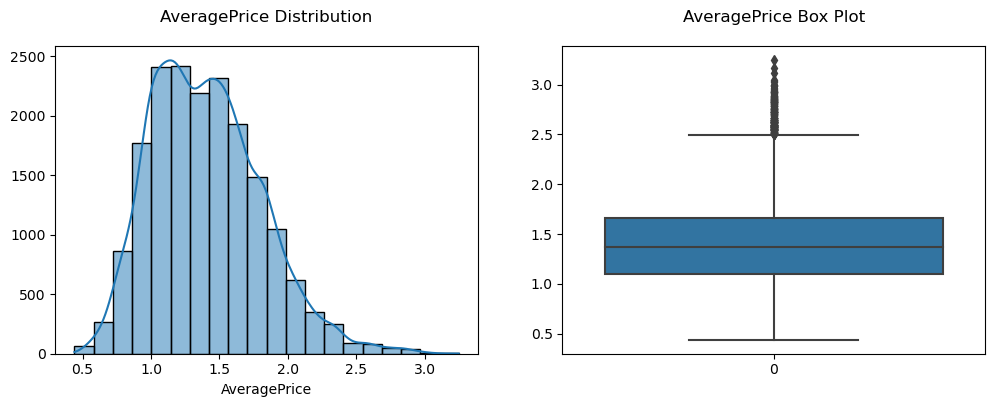

Skewness of AveragePrice : 0.5803027378878419


In [30]:
#DATA VISUALISATION
#Average price Feature
#Visualize target distribution
col = 'AveragePrice'
fig, axes = plt.subplots(1, 2, figsize=(12, 4))


sns.histplot(df[col], kde=True , bins=20, ax=axes[0])
sns.boxplot(df[col], ax=axes[1])

axes[0].set_title(f'AveragePrice Distribution', size=12, y=1.05)
axes[0].set_ylabel('', size=10, labelpad=8)

axes[1].set_title(f'AveragePrice Box Plot', size=12, y=1.05)

plt.show()

# Show the skewness 
print(f"Skewness of AveragePrice : {df['AveragePrice'].skew()}")

The average price graph is showing skewness towards to the right and there are many outliers present in the dataset.

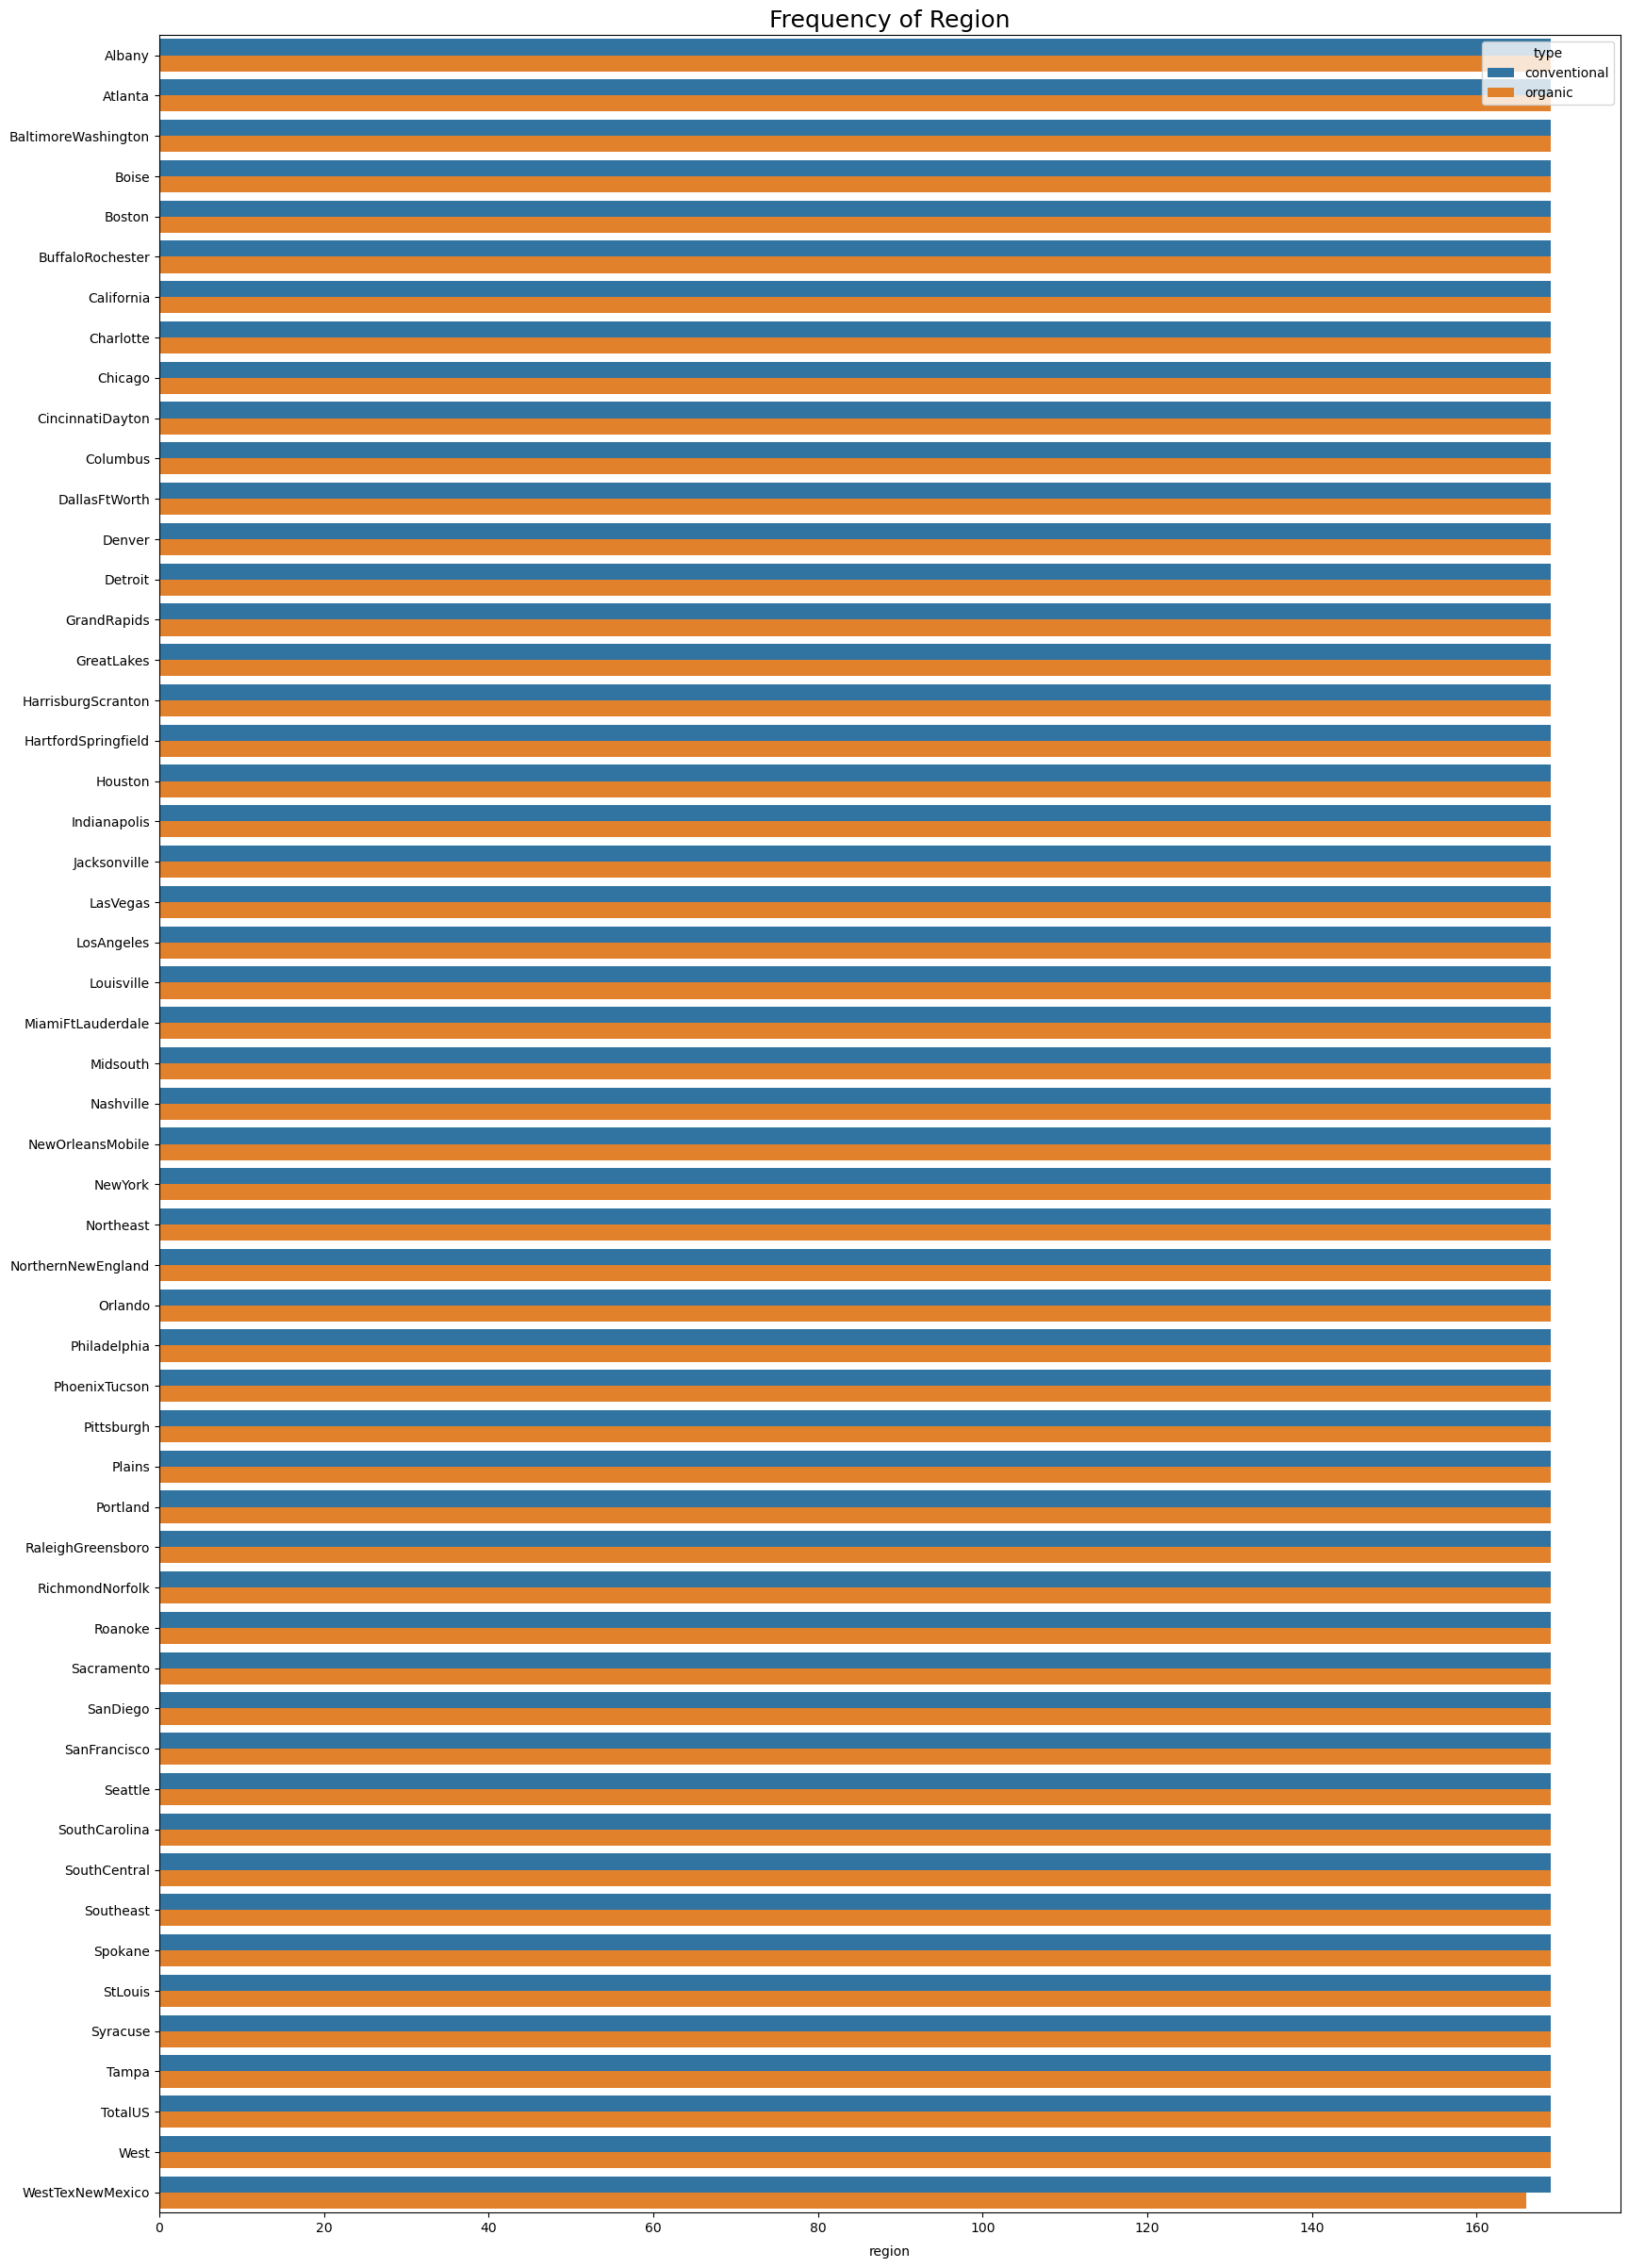

In [31]:
#Region Feature
col='region'
plt.figure(figsize=(20, 30))
ax = sns.countplot(y=col, hue='type', data=df)

plt.xlabel(col, size=10, labelpad=8)
plt.ylabel('', size=10, labelpad=8)
plt.title(f"Frequency of Region", size=18, y=1);

The region feature data are almost balanced.

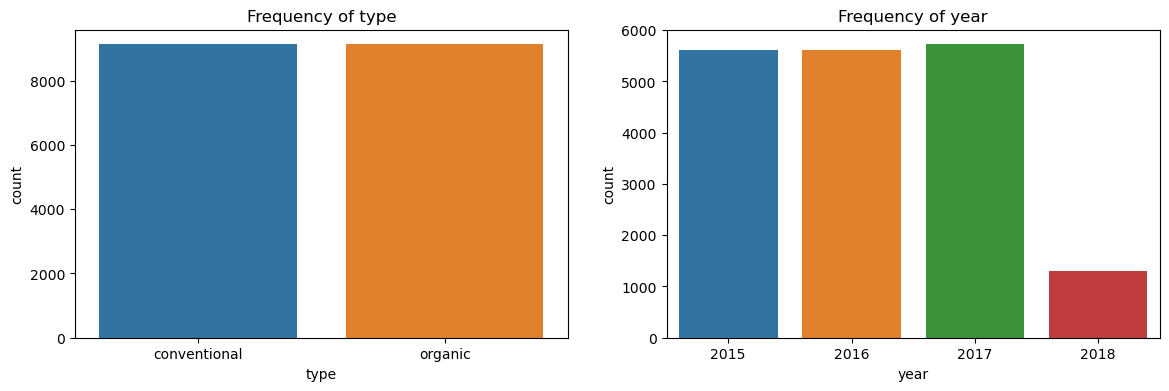

In [32]:
#Independent Variables type and year visualisation
cate_col = ['type', 'year']

fig, axs = plt.subplots(1, 2, figsize=(14, 4))

for ax, column in zip(axs.flat, cate_col):
    sns.countplot(data=df, x=column, ax=ax)
    ax.set_title(f"Frequency of {column}")

plt.subplots_adjust(hspace=0.5)
plt.show()


The data is balanced in the type feature.
The data in year is balanced for 2015,2016 and 2017 years but there are fewer records for 2018.

In [33]:
# Now checking for numerical columns
numerical_col=[]
for i in df.dtypes.index:
    if df.dtypes[i]!='object':
        numerical_col.append(i)
print(numerical_col)

['AveragePrice', 'Total Volume', '4046', '4225', '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'year', 'Month', 'Day']


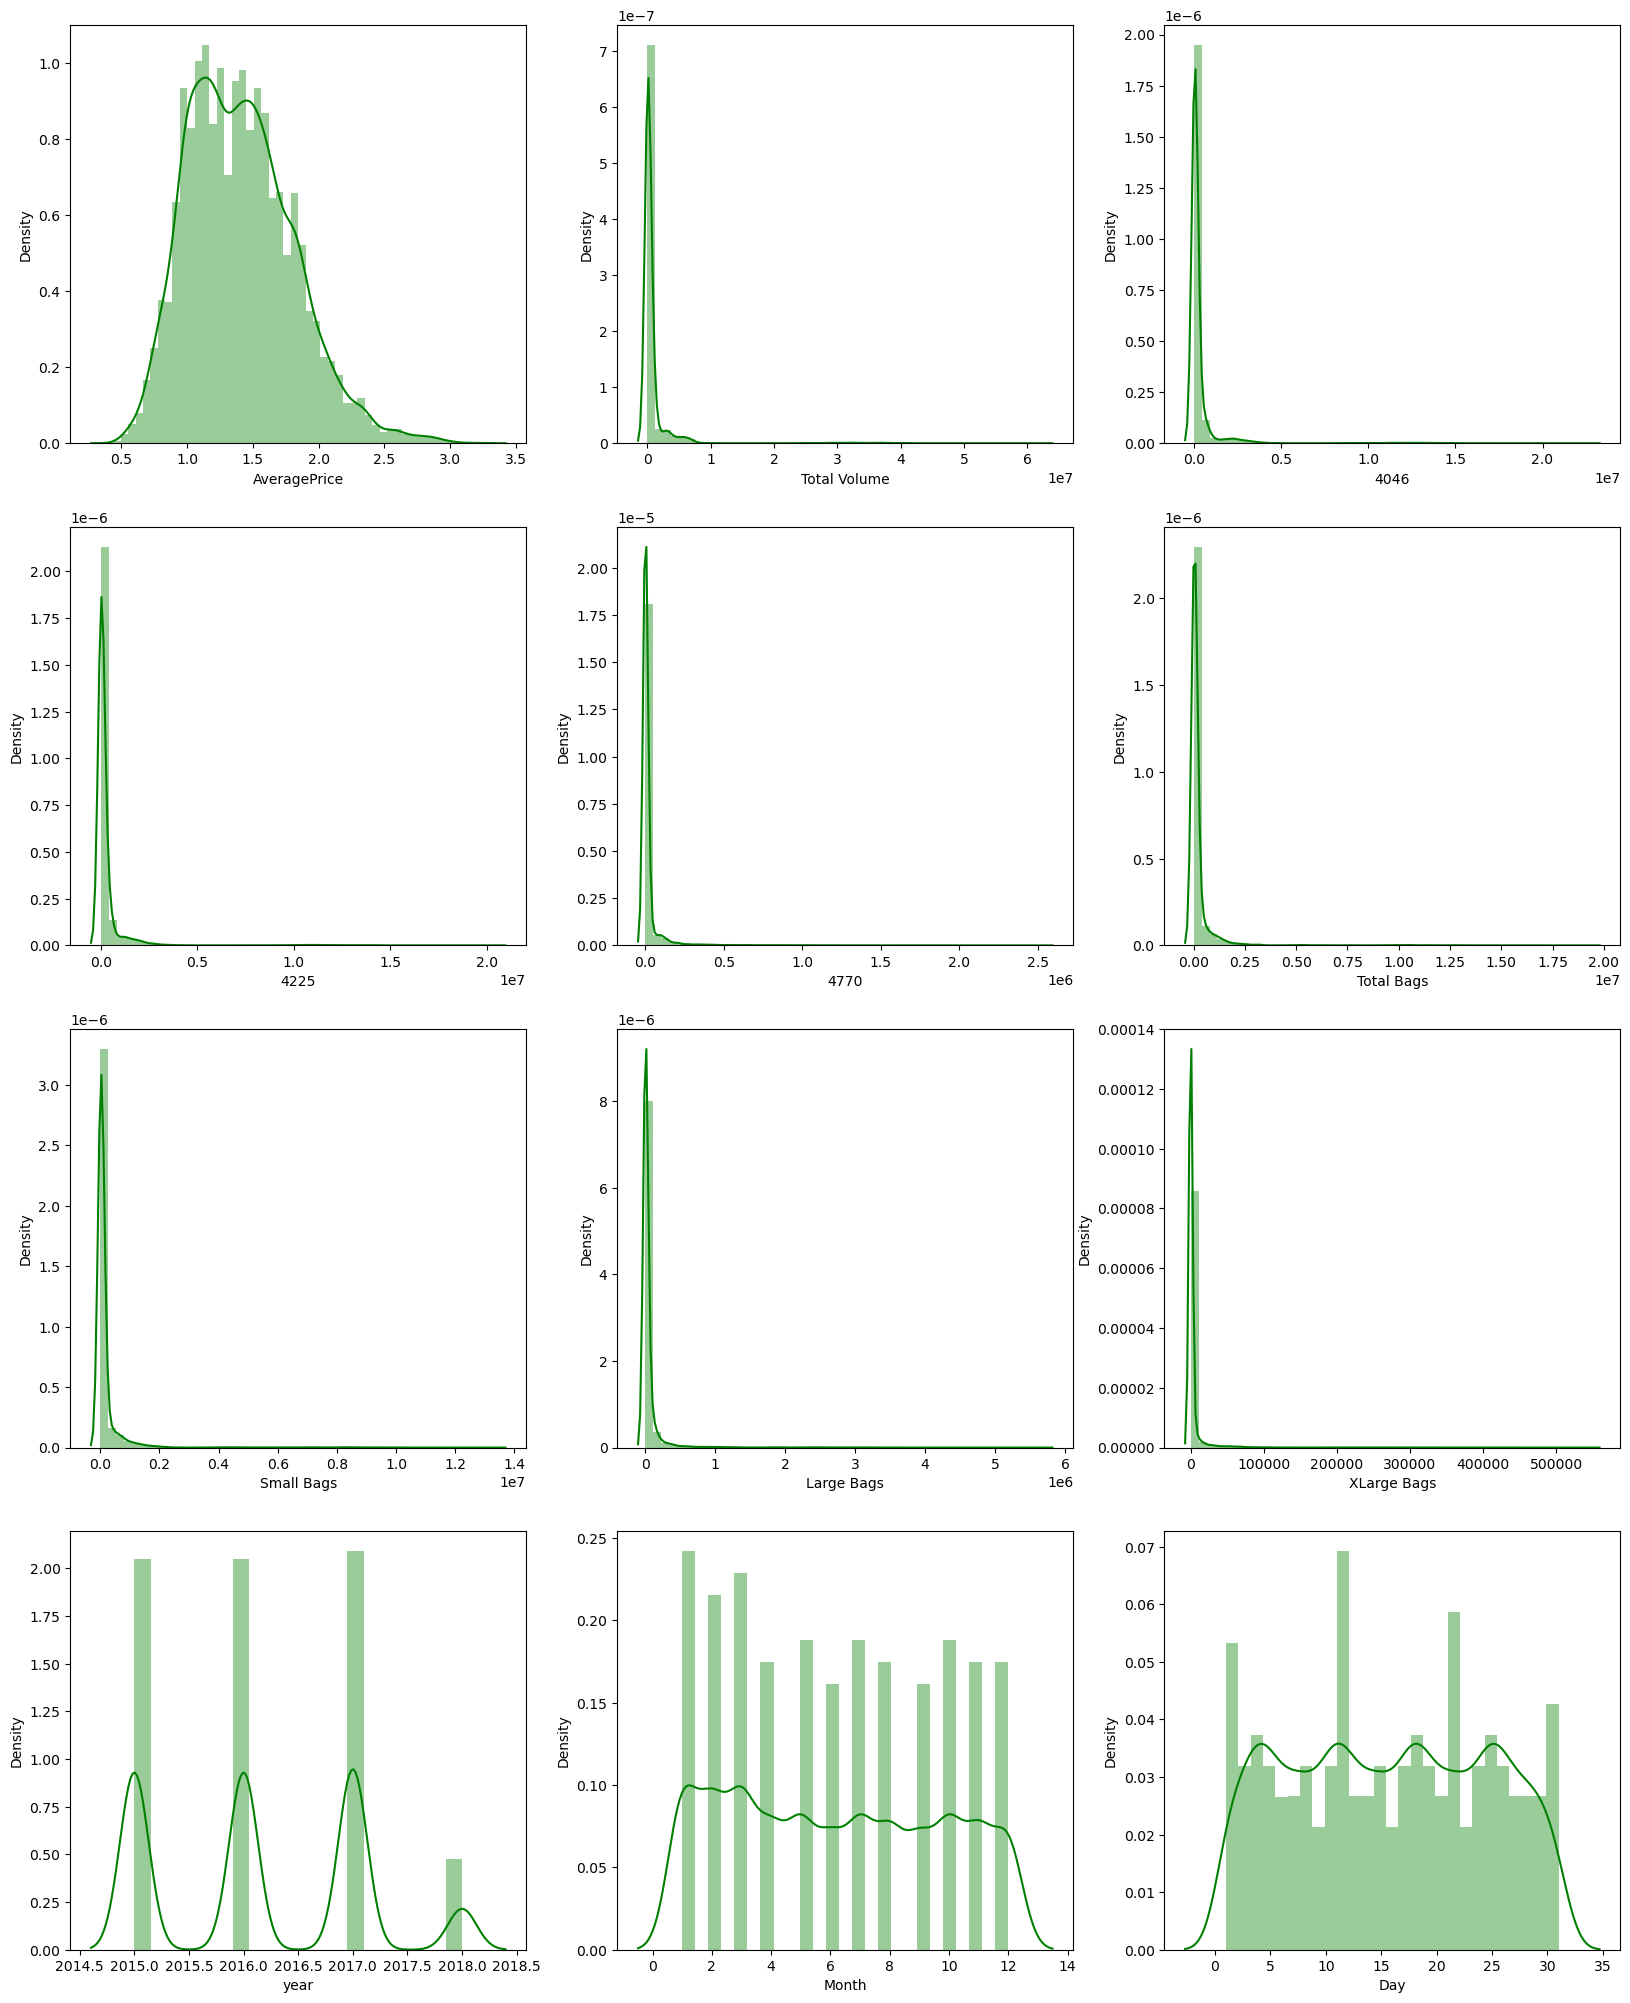

In [34]:
#Numerical Values visualisation

plt.figure(figsize=(20,25))
plotnumber = 1

for column in numerical_col:
    if plotnumber<=14:
        ax = plt.subplot(4,3,plotnumber)
        sns.distplot(df[column],color='g')
        plt.xlabel(column,fontsize=10)
    plotnumber+=1
plt.show()

Almost all are having skewness which has to be corrected after taking care of outliers.


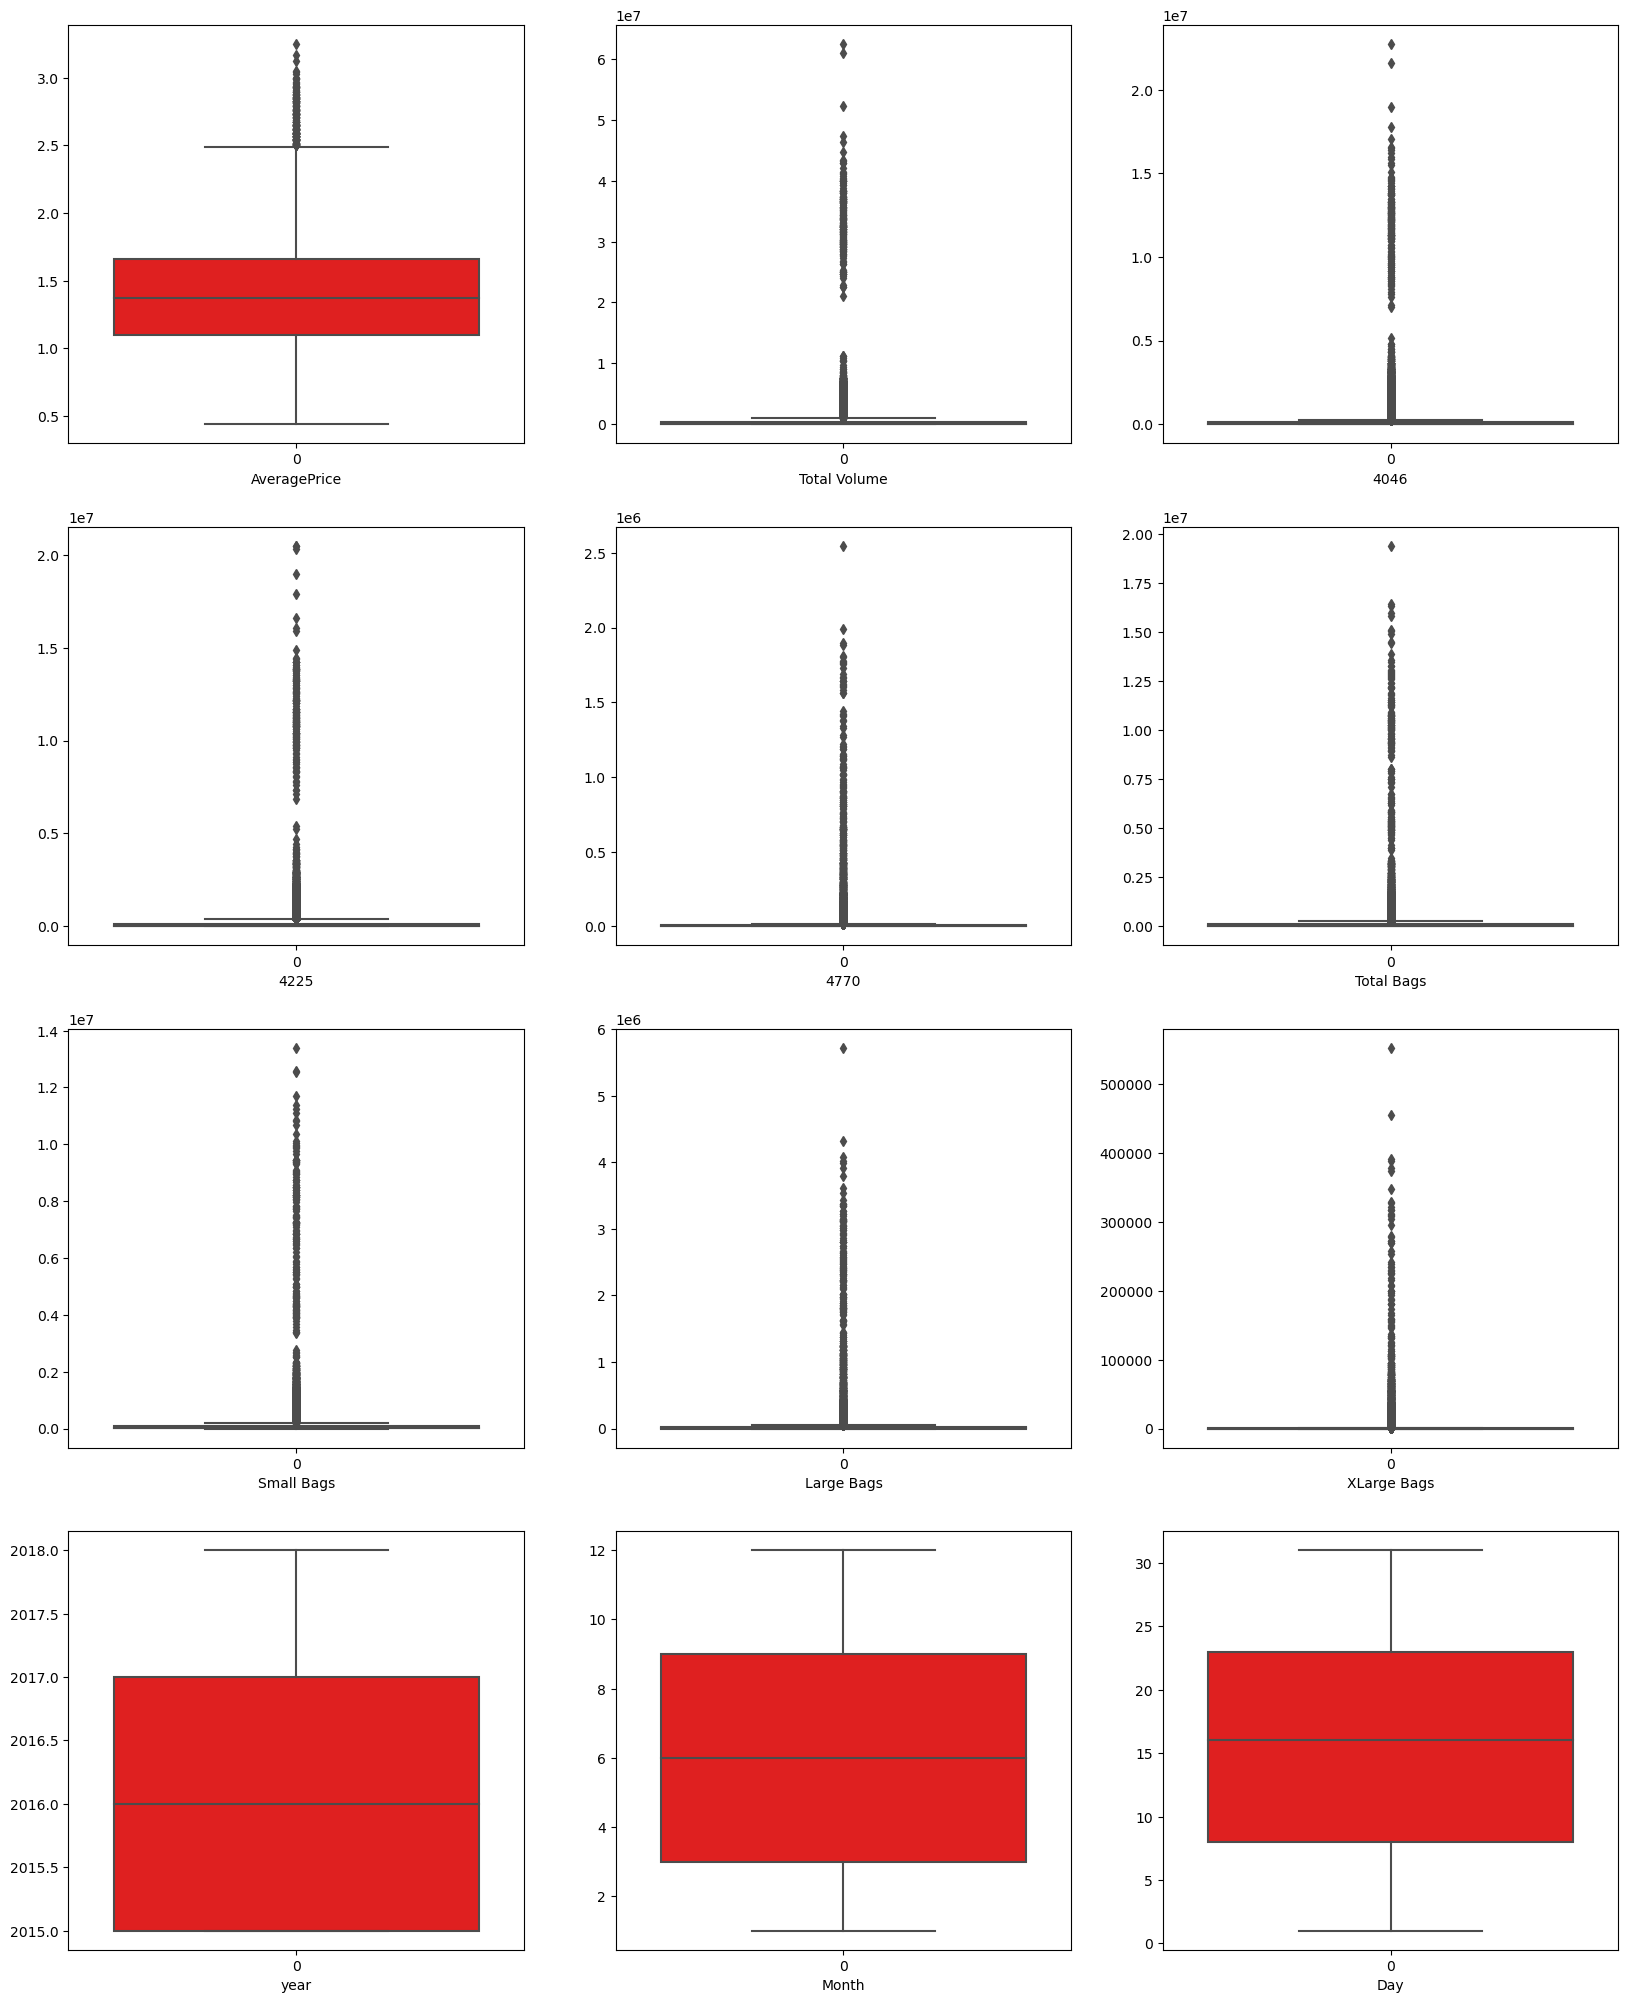

In [35]:
plt.figure(figsize=(20,25))
plotnumber = 1

for column in numerical_col:
    if plotnumber<=14:
        ax = plt.subplot(4,3,plotnumber)
        sns.boxplot(df[column],color='r')
        plt.xlabel(column,fontsize=10)
    plotnumber+=1
plt.show()

We could see that the box plot shows lot of outliers to be taken care off. Lets go ahead .

Text(0, 0.5, 'AveragePrice')

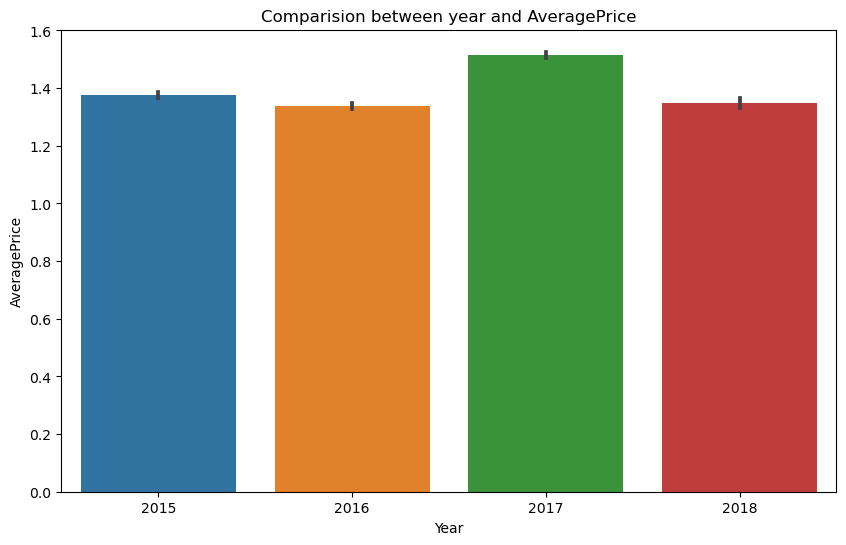

In [36]:
#BIVARIATE ANALYSIS
# Checking which year has maximum AveragePrice
plt.figure(figsize=[10,6])
plt.title('Comparision between year and AveragePrice')
sns.barplot(x=df['year'],y=df['AveragePrice'],data=df);
plt.xlabel("Year")
plt.ylabel("AveragePrice")

From bar plot we can infer that we had higher average price in the year 2017 followed by 2015.

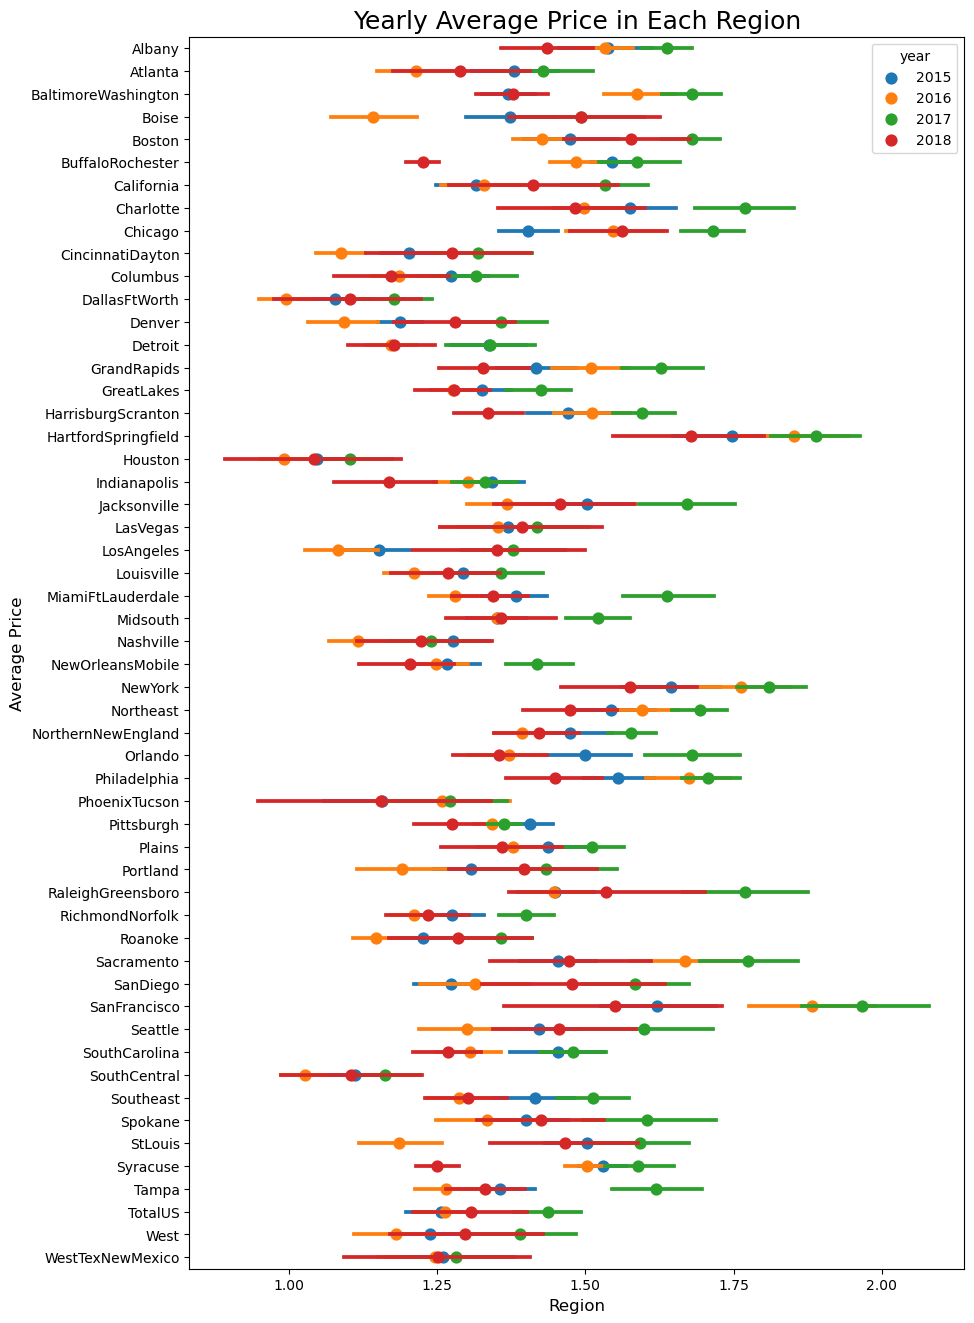

In [37]:
#Average price in each region
plt.figure(figsize=(10,16))
sns.pointplot(x='AveragePrice', y='region', data=df, hue='year', join=False)

# Set the x axis for average price
plt.xticks(np.linspace(1,2,5))

plt.xlabel('Region', {'fontsize' : 12})
plt.ylabel('Average Price', {'fontsize':12})
plt.title("Yearly Average Price in Each Region", size=18, y=1);

We can see how average price behaves in different region, we can see that the best was in SanFrancisco in 2017 
and worst price can be seen in houston region 2018.

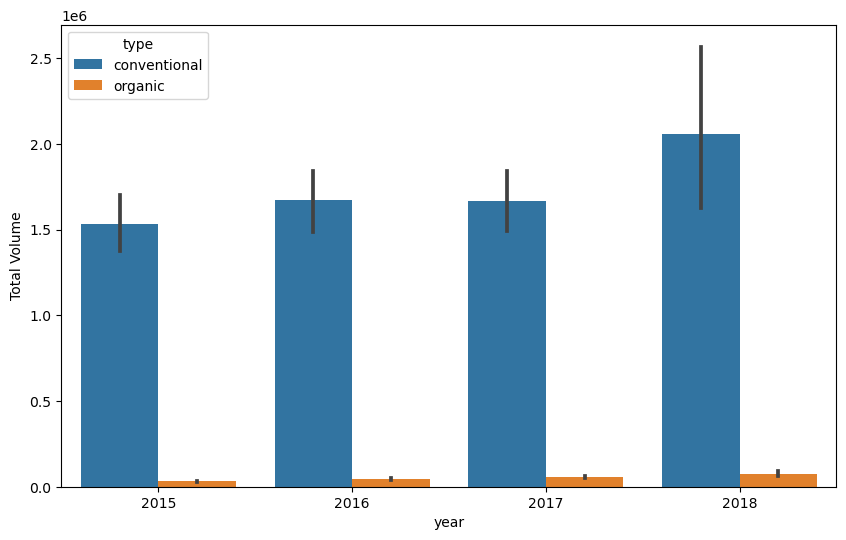

In [38]:
#Lets see the total volume against the year based on the avacado type.
plt.figure(figsize=(10,6))
sns.barplot(x='year',y='Total Volume',hue="type",data=df)
plt.show()


We can see that conventional type of avacados were sold higher when compared to organic avacados. Its also seen that 
the sales for conventional type was higher in 2018 and low in 2015. From this we can conclude that there is always 
demand for conventional type than organic ones.

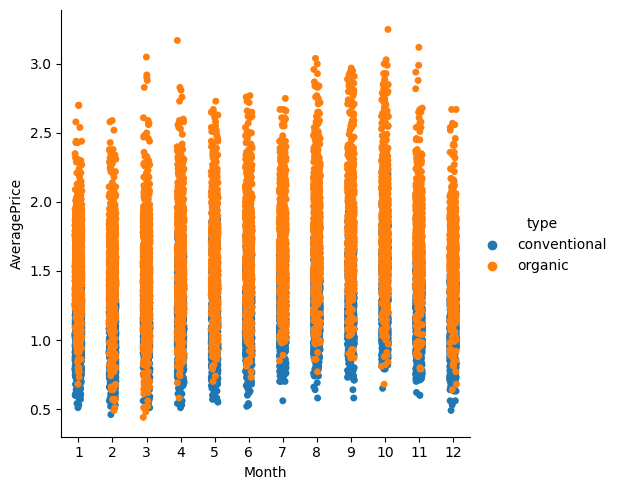

In [39]:
sns.catplot(x="Month", y="AveragePrice", hue="type",data=df);


We can see that the average price for organic variety is always higher than conventional. 

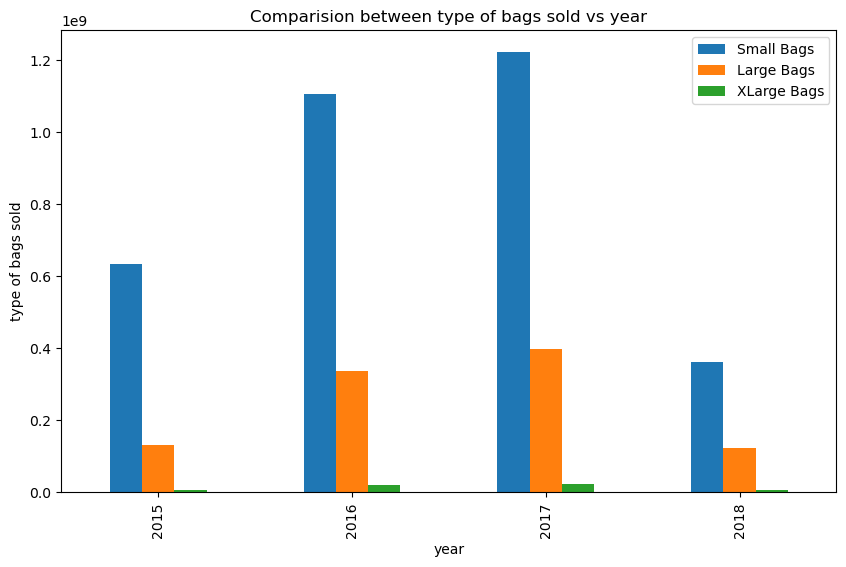

In [40]:
#Visualisation between bags sold and year
feature = df[["Small Bags","Large Bags","XLarge Bags"]].groupby(df.year).sum()
feature.plot(kind='bar', fontsize=10,figsize=(10,6))
plt.title("Comparision between type of bags sold vs year")
plt.xlabel("year")
plt.ylabel("type of bags sold")
plt.show()

We can see that people preferred more of small bags when compared to other size bags of avacado.
We could see that XL bags are very less.

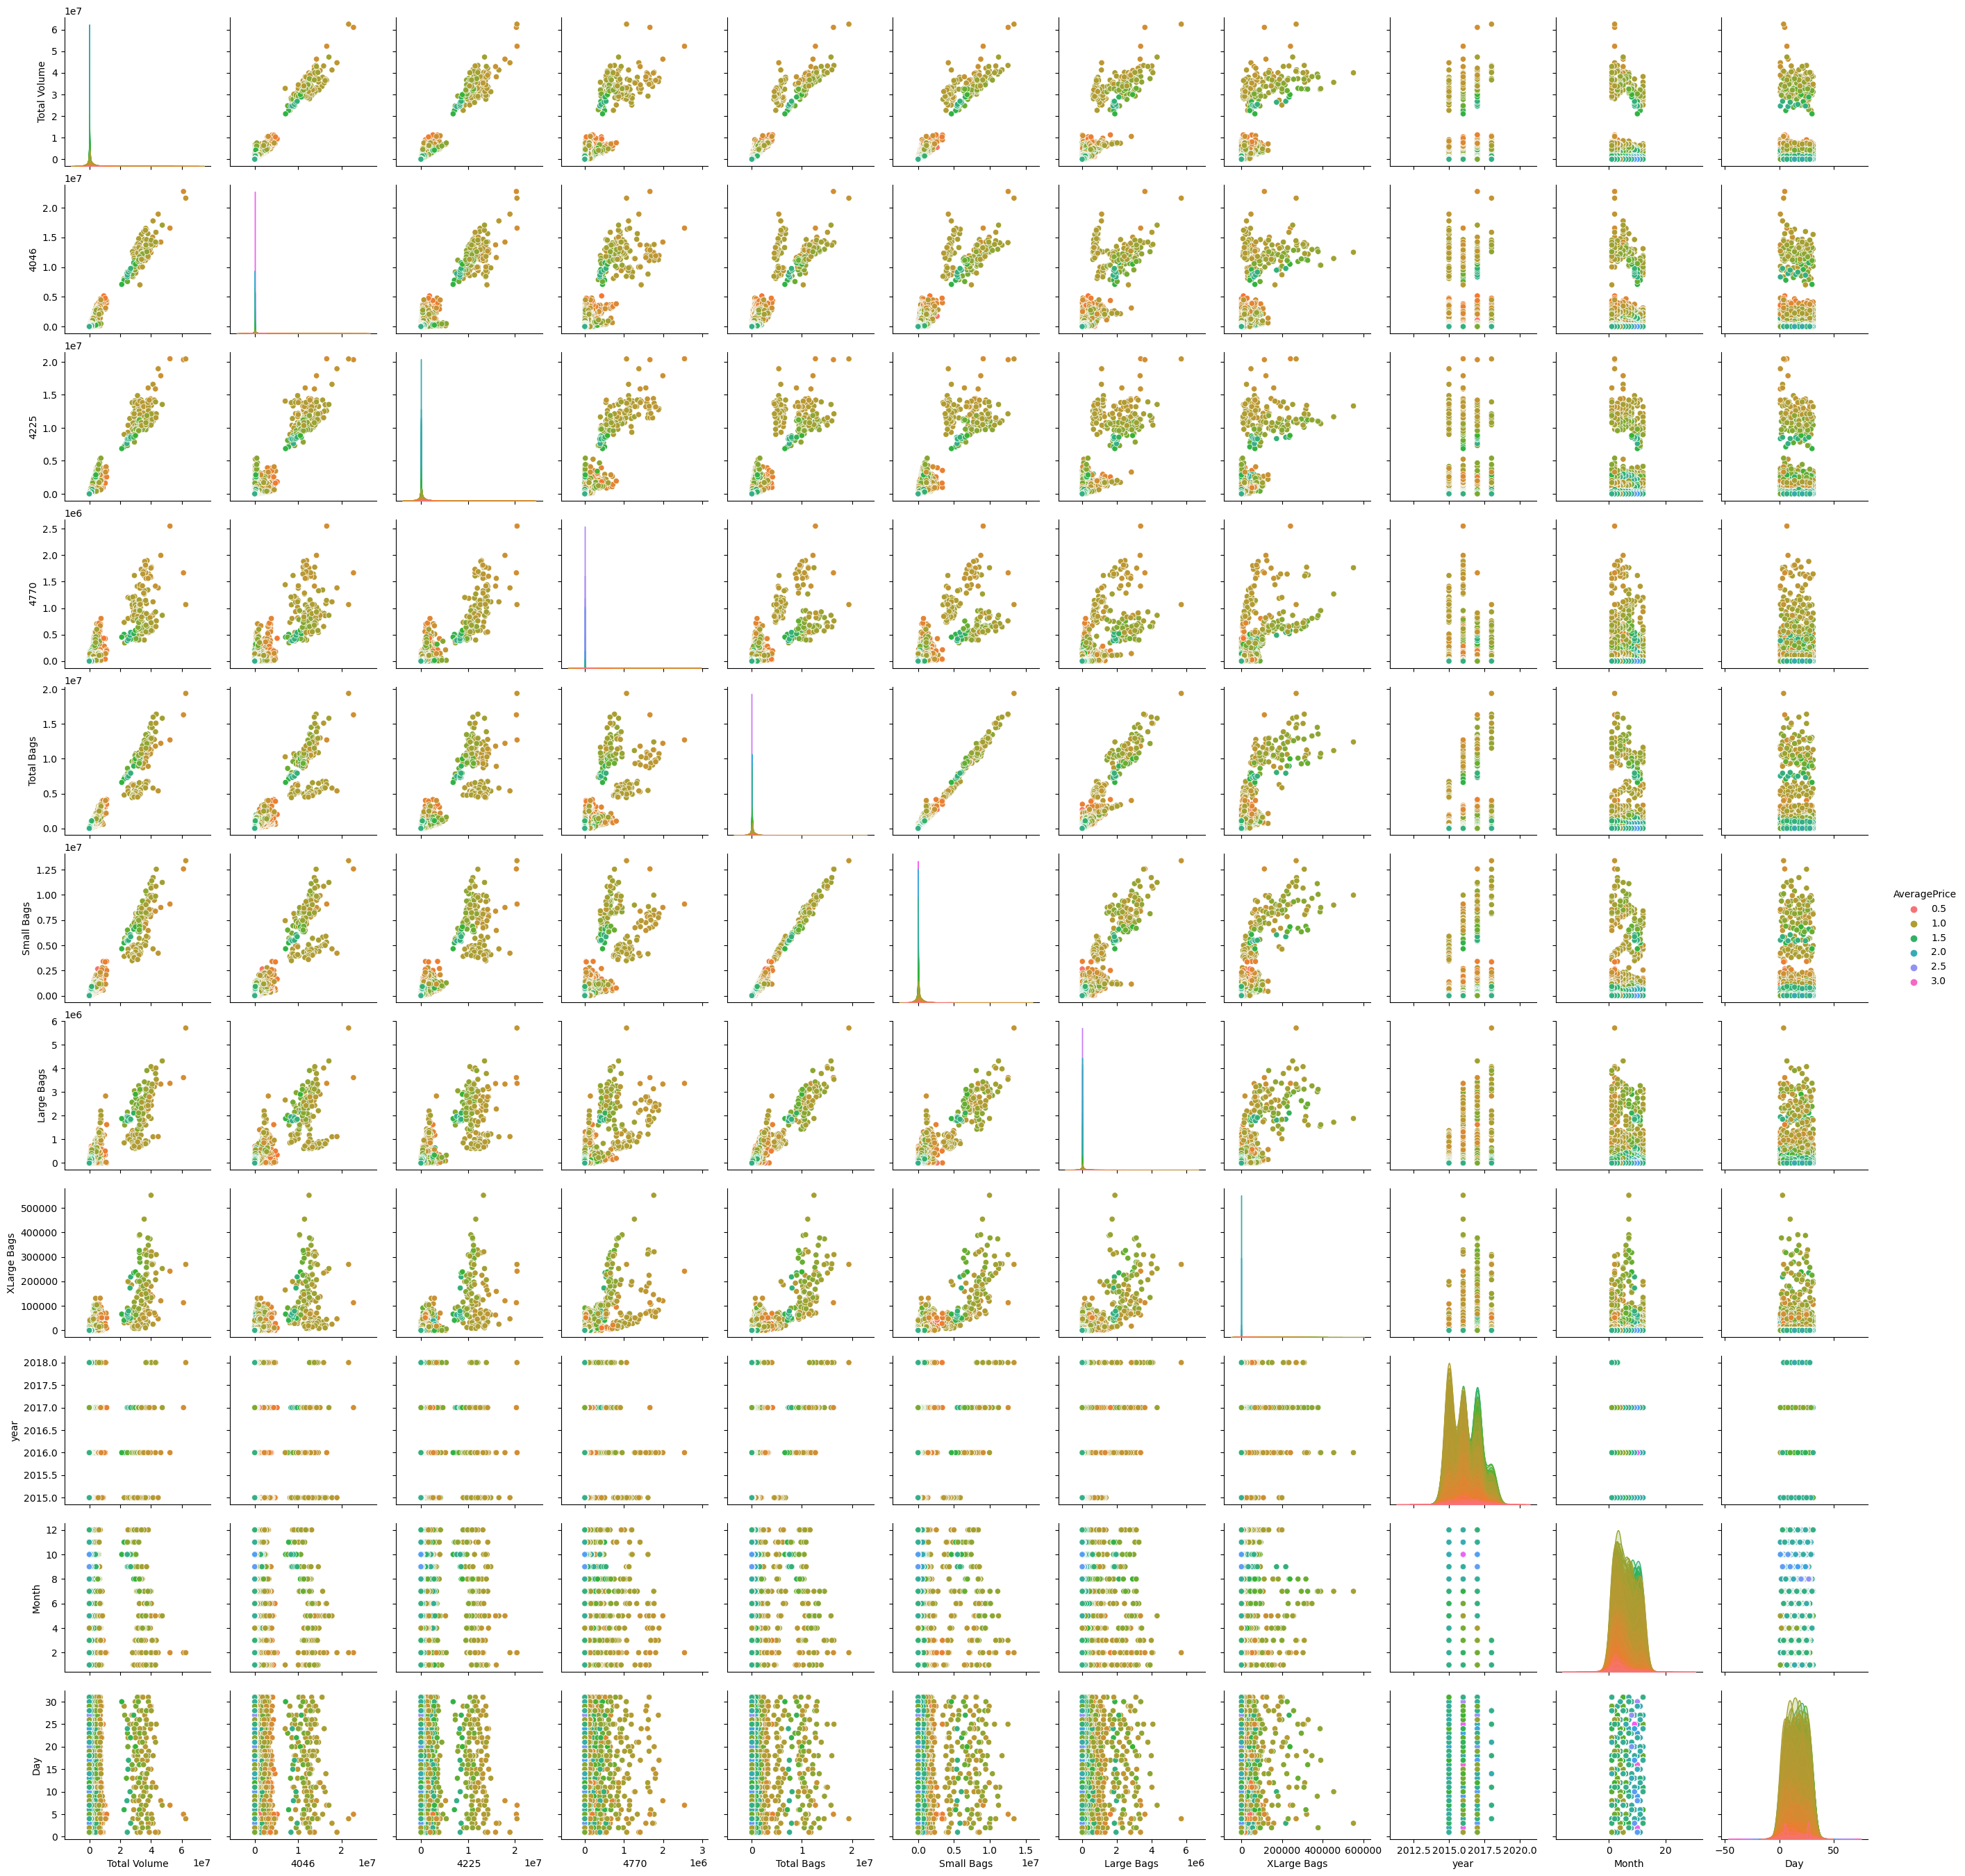

In [41]:
#Multivariate analysis
sns.pairplot(df,hue="AveragePrice",palette="husl")

From the above analysis we can see that there are more of negative relationship between the feature and the target. 
There is a positive relationship between Total Volume, 4046, 4225, 4770, Total Bags, Small Bags, Large Bags, and XLarge Bags.

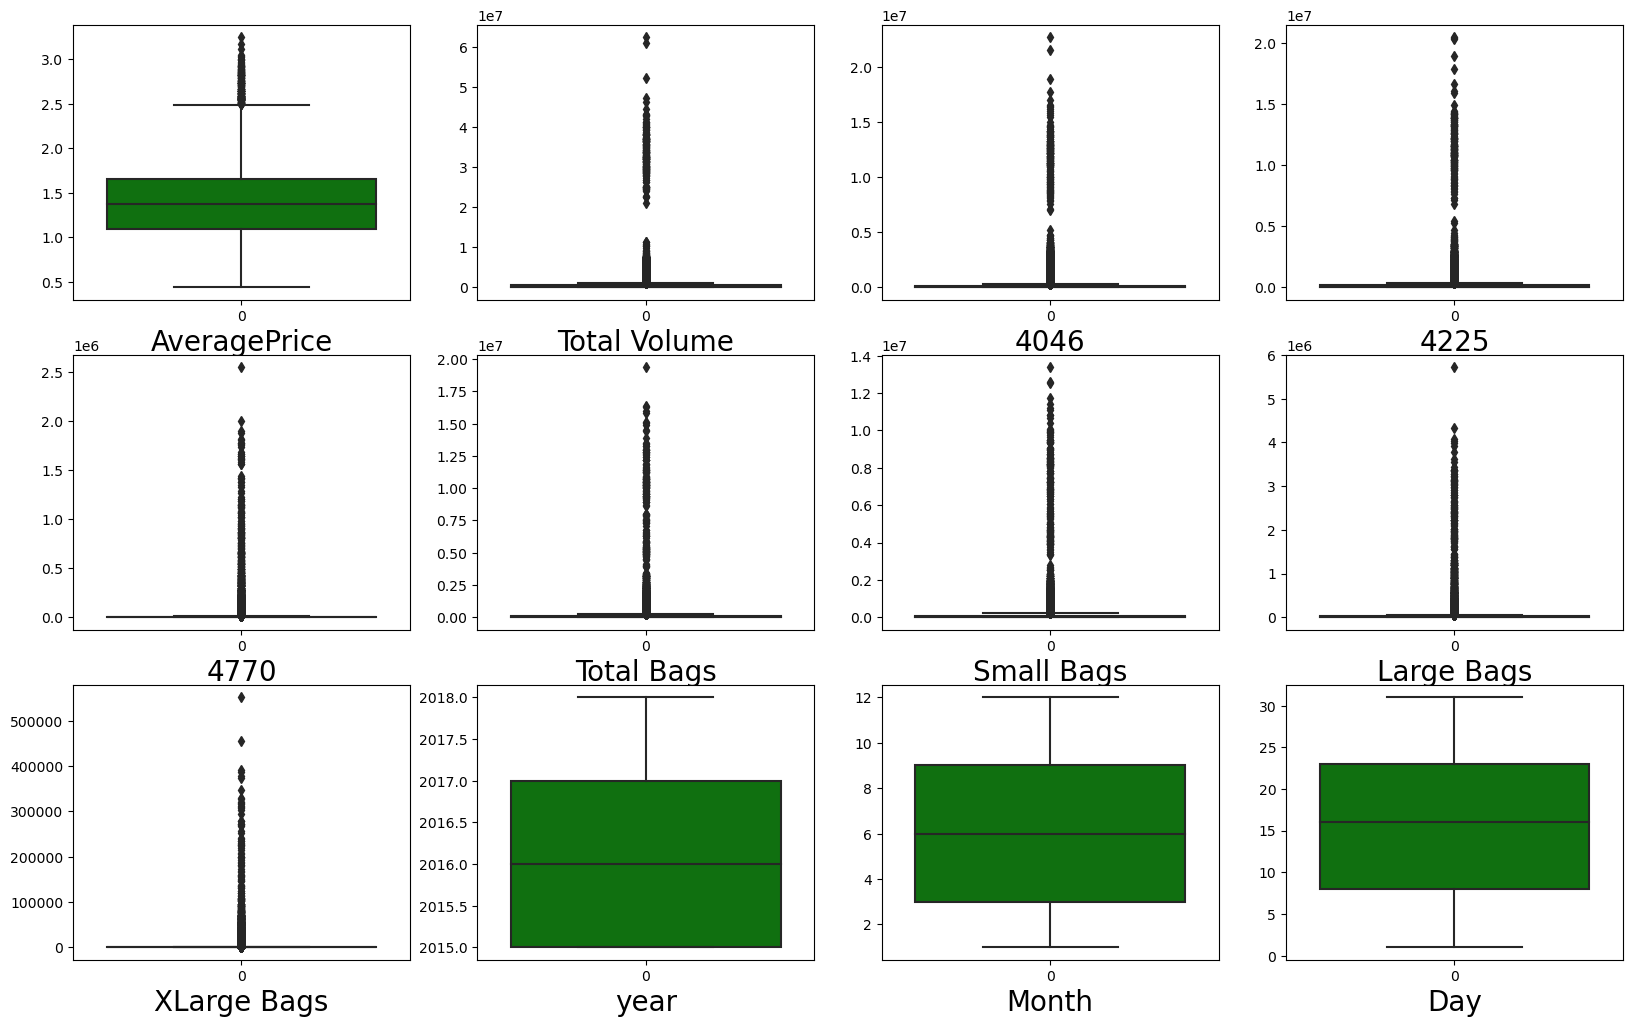

In [42]:
#Identifying the outliers
numerical_col=['AveragePrice', 'Total Volume', '4046', '4225', '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'year','Month', 'Day']
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in numerical_col:
    if plotnumber<=18:
        ax = plt.subplot(6,4,plotnumber)
        sns.boxplot(df[column],color='g')
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

Other than year,month and day all the other variables show extreme outliers. Even average price has outliers but being target variable we will leave it untouched.

In [43]:
#Removing Outliers
df.columns

Index(['AveragePrice', 'Total Volume', '4046', '4225', '4770', 'Total Bags',
       'Small Bags', 'Large Bags', 'XLarge Bags', 'type', 'year', 'region',
       'Month', 'Day'],
      dtype='object')

In [44]:
#Feataures containing outliers
features=df[['Total Volume', '4046', '4225', '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags']]

In [45]:
# Using zscore to remove outliers
from scipy.stats import zscore

z=np.abs(zscore(features))

z

Total Volume      4046      4225      4770  Total Bags  Small Bags  \
0          0.227716  0.230816  0.199902  0.212091    0.234170    0.232647   
1          0.230427  0.231103  0.208054  0.211997    0.233350    0.231568   
2          0.212085  0.231007  0.154478  0.211325    0.234730    0.233399   
3          0.223444  0.230741  0.185350  0.211864    0.237096    0.236568   
4          0.231538  0.230891  0.208719  0.211834    0.236718    0.236154   
...             ...       ...       ...       ...         ...         ...   
18244      0.241373  0.230017  0.243857  0.212540    0.229301    0.226665   
18245      0.242296  0.230693  0.242277  0.212540    0.233594    0.232196   
18246      0.242331  0.230693  0.243090  0.205766    0.233463    0.231644   
18247      0.241625  0.230428  0.242651  0.205774    0.231866    0.229543   
18248      0.241253  0.229347  0.243170  0.210450    0.230807    0.228111   

       Large Bags  XLarge Bags  
0        0.222352      0.17558  
1        0.222335      0.17558  
2        0.222311      0.17558  
3        0.222186      0.17558  
4        0.221924      0.17558  
...           ...          ...  
18244    0.220964      0.17558  
18245    0.221403      0.17558  
18246    0.222561      0.17558  
18247    0.222529      0.17558  
18248    0.222628      0.17558  

[18249 rows x 8 columns]

In [46]:
# Creating new dataframe
new_df = df[(z<3).all(axis=1)] 
new_df

AveragePrice  Total Volume     4046       4225    4770  Total Bags  \
0              1.33      64236.62  1036.74   54454.85   48.16     8696.87   
1              1.35      54876.98   674.28   44638.81   58.33     9505.56   
2              0.93     118220.22   794.70  109149.67  130.50     8145.35   
3              1.08      78992.15  1132.00   71976.41   72.58     5811.16   
4              1.28      51039.60   941.48   43838.39   75.78     6183.95   
...             ...           ...      ...        ...     ...         ...   
18244          1.63      17074.83  2046.96    1529.20    0.00    13498.67   
18245          1.71      13888.04  1191.70    3431.50    0.00     9264.84   
18246          1.87      13766.76  1191.92    2452.79  727.94     9394.11   
18247          1.93      16205.22  1527.63    2981.04  727.01    10969.54   
18248          1.62      17489.58  2894.77    2356.13  224.53    12014.15   

       Small Bags  Large Bags  XLarge Bags          type  year  \
0         8603.62       93.25          0.0  conventional  2015   
1         9408.07       97.49          0.0  conventional  2015   
2         8042.21      103.14          0.0  conventional  2015   
3         5677.40      133.76          0.0  conventional  2015   
4         5986.26      197.69          0.0  conventional  2015   
...           ...         ...          ...           ...   ...   
18244    13066.82      431.85          0.0       organic  2018   
18245     8940.04      324.80          0.0       organic  2018   
18246     9351.80       42.31          0.0       organic  2018   
18247    10919.54       50.00          0.0       organic  2018   
18248    11988.14       26.01          0.0       organic  2018   

                 region  Month  Day  
0                Albany     12   27  
1                Albany     12   20  
2                Albany     12   13  
3                Albany     12    6  
4                Albany     11   29  
...                 ...    ...  ...  
18244  WestTexNewMexico      2    4  
18245  WestTexNewMexico      1   28  
18246  WestTexNewMexico      1   21  
18247  WestTexNewMexico      1   14  
18248  WestTexNewMexico      1    7  

[17782 rows x 14 columns]

In [47]:
#Encoding the catergorical data - type and region by usug label encoder
categorical_col = ["type","region"]
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()
new_df[categorical_col]= new_df[categorical_col].apply(LE.fit_transform)
new_df[categorical_col]

type  region
0         0       0
1         0       0
2         0       0
3         0       0
4         0       0
...     ...     ...
18244     1      53
18245     1      53
18246     1      53
18247     1      53
18248     1      53

[17782 rows x 2 columns]

In [48]:
#Checking the skewness
new_df.skew()

AveragePrice    0.560969
Total Volume    3.782060
4046            4.928850
4225            4.472729
4770            5.137120
Total Bags      4.082103
Small Bags      4.238647
Large Bags      5.072468
XLarge Bags     6.159391
type           -0.052210
year            0.220792
region          0.005773
Month           0.098217
Day             0.011251
dtype: float64

In [49]:
# Removing skewness using yeo-johnson method to get better prediction
features = ['Total Volume', '4046', '4225', '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags']


scaler = PowerTransformer(method='yeo-johnson')
'''
parameters:
method = 'box-cox' or 'yeo-johnson'
'''

"\nparameters:\nmethod = 'box-cox' or 'yeo-johnson'\n"

In [50]:
new_df[features] = scaler.fit_transform(new_df[features].values)
new_df[features].head()

Total Volume      4046      4225      4770  Total Bags  Small Bags  \
0     -0.065094 -0.649918  0.358278 -0.212550   -0.527445   -0.337064   
1     -0.137269 -0.770067  0.276355 -0.165117   -0.488205   -0.301038   
2      0.215503 -0.724508  0.656010  0.034215   -0.556204   -0.364044   
3      0.029840 -0.625017  0.475615 -0.110976   -0.702370   -0.500341   
4     -0.170456 -0.677083  0.268966 -0.100289   -0.675712   -0.479918   

   Large Bags  XLarge Bags  
0   -0.775214    -0.675702  
1   -0.765237    -0.675702  
2   -0.752534    -0.675702  
3   -0.693012    -0.675702  
4   -0.600755    -0.675702

In [51]:
new_df.skew()

AveragePrice    0.560969
Total Volume   -0.006809
4046           -0.038259
4225           -0.043246
4770            0.028015
Total Bags     -0.021531
Small Bags     -0.024657
Large Bags     -0.110061
XLarge Bags     0.860603
type           -0.052210
year            0.220792
region          0.005773
Month           0.098217
Day             0.011251
dtype: float64

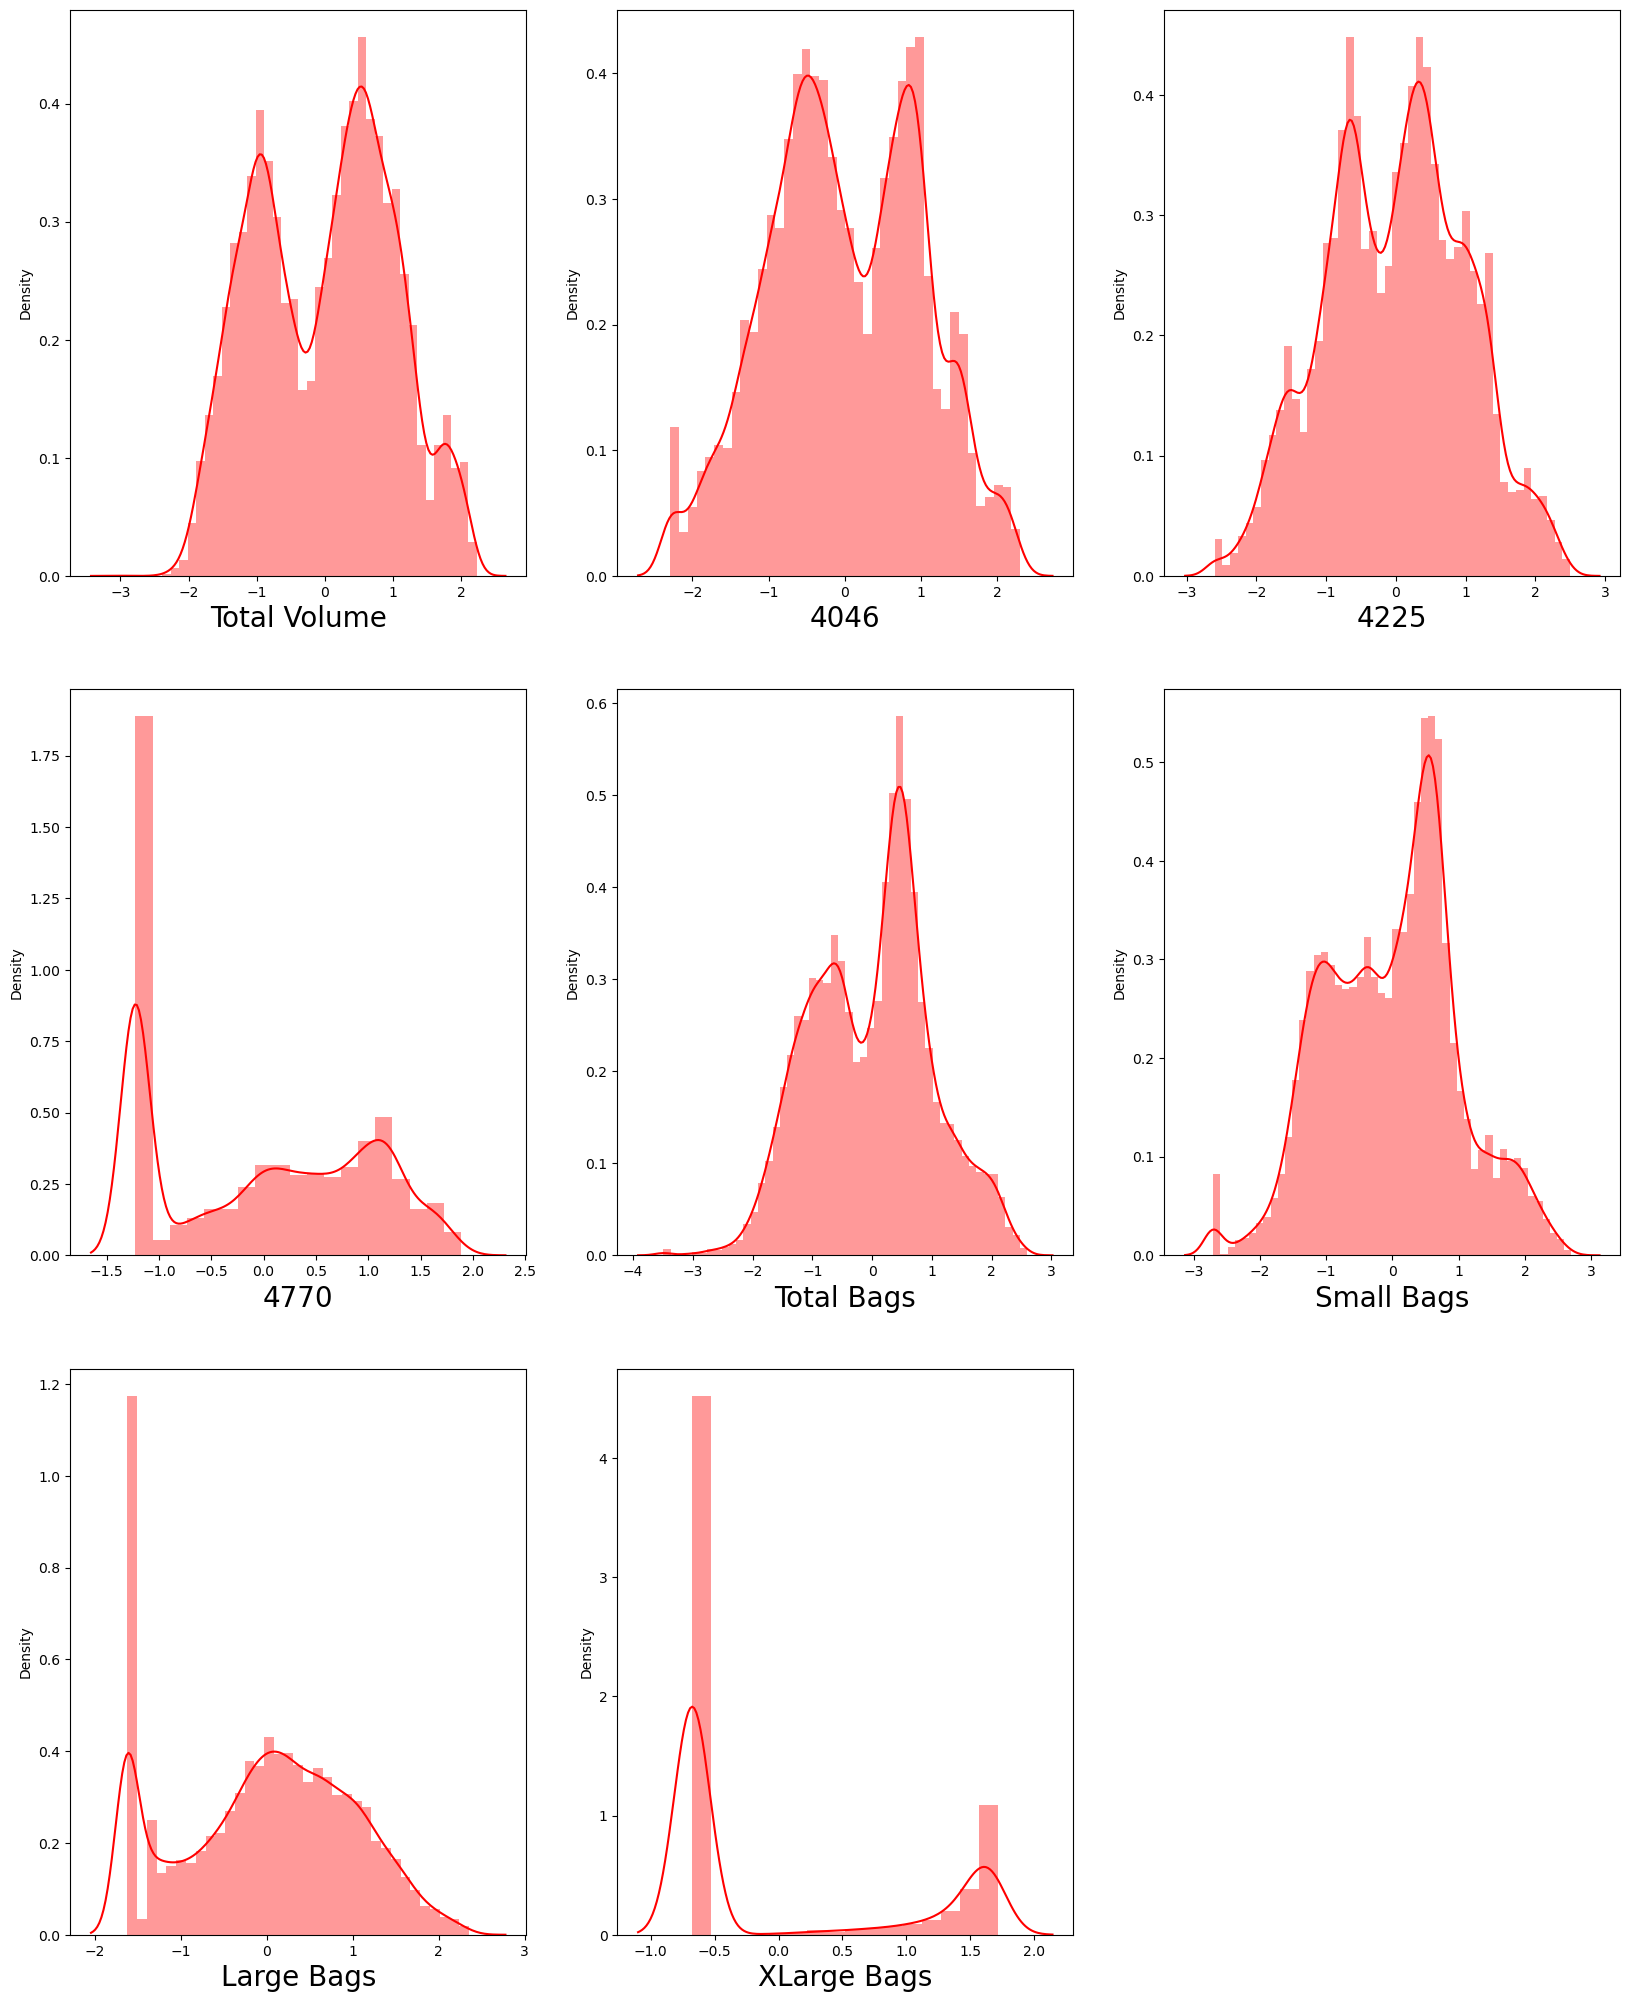

In [52]:
#Lets see the visualisation for the skewness
# After removing let's check how the data has been distributed in each column.

plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in new_df[features]:
    if plotnumber<=9:
        ax = plt.subplot(3,3,plotnumber)
        sns.distplot(new_df[column],color='r')
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

#Skewness seems to be removed and the dataset is normal.

In [53]:
#Correlation between the independant variables and target.
cor=new_df.corr()
cor

AveragePrice  Total Volume      4046      4225      4770  \
AveragePrice      1.000000     -0.576829 -0.548618 -0.448579 -0.491320   
Total Volume     -0.576829      1.000000  0.889083  0.924160  0.818568   
4046             -0.548618      0.889083  1.000000  0.764679  0.736523   
4225             -0.448579      0.924160  0.764679  1.000000  0.796799   
4770             -0.491320      0.818568  0.736523  0.796799  1.000000   
Total Bags       -0.564616      0.939776  0.799354  0.818511  0.761641   
Small Bags       -0.493621      0.905098  0.778765  0.784901  0.754305   
Large Bags       -0.477879      0.681427  0.601899  0.614878  0.548457   
XLarge Bags      -0.387285      0.629592  0.573880  0.584508  0.616413   
type              0.608447     -0.800828 -0.725826 -0.747722 -0.780988   
year              0.099910      0.076584 -0.002396 -0.004533 -0.051657   
region            0.010428      0.065709  0.159390  0.032273  0.037805   
Month             0.157900     -0.026332 -0.025919 -0.024708 -0.017377   
Day               0.024742     -0.006248 -0.004558 -0.005919  0.001383   

              Total Bags  Small Bags  Large Bags  XLarge Bags      type  \
AveragePrice   -0.564616   -0.493621   -0.477879    -0.387285  0.608447   
Total Volume    0.939776    0.905098    0.681427     0.629592 -0.800828   
4046            0.799354    0.778765    0.601899     0.573880 -0.725826   
4225            0.818511    0.784901    0.614878     0.584508 -0.747722   
4770            0.761641    0.754305    0.548457     0.616413 -0.780988   
Total Bags      1.000000    0.949901    0.729652     0.613698 -0.725686   
Small Bags      0.949901    1.000000    0.566307     0.603334 -0.720466   
Large Bags      0.729652    0.566307    1.000000     0.452650 -0.500026   
XLarge Bags     0.613698    0.603334    0.452650     1.000000 -0.665587   
type           -0.725686   -0.720466   -0.500026    -0.665587  1.000000   
year            0.210924    0.185955    0.190295     0.159574  0.007399   
region          0.065996    0.051985    0.086573    -0.020865  0.021970   
Month          -0.014571   -0.010260   -0.016942     0.018751 -0.005044   
Day            -0.003703   -0.000535   -0.000876     0.010241 -0.002469   

                  year    region     Month       Day  
AveragePrice  0.099910  0.010428  0.157900  0.024742  
Total Volume  0.076584  0.065709 -0.026332 -0.006248  
4046         -0.002396  0.159390 -0.025919 -0.004558  
4225         -0.004533  0.032273 -0.024708 -0.005919  
4770         -0.051657  0.037805 -0.017377  0.001383  
Total Bags    0.210924  0.065996 -0.014571 -0.003703  
Small Bags    0.185955  0.051985 -0.010260 -0.000535  
Large Bags    0.190295  0.086573 -0.016942 -0.000876  
XLarge Bags   0.159574 -0.020865  0.018751  0.010241  
type          0.007399  0.021970 -0.005044 -0.002469  
year          1.000000 -0.003610 -0.173166  0.004044  
region       -0.003610  1.000000  0.002175  0.000751  
Month        -0.173166  0.002175  1.000000  0.010456  
Day           0.004044  0.000751  0.010456  1.000000

(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5, 13.5]),
 [Text(0, 0.5, 'AveragePrice'),
  Text(0, 1.5, 'Total Volume'),
  Text(0, 2.5, '4046'),
  Text(0, 3.5, '4225'),
  Text(0, 4.5, '4770'),
  Text(0, 5.5, 'Total Bags'),
  Text(0, 6.5, 'Small Bags'),
  Text(0, 7.5, 'Large Bags'),
  Text(0, 8.5, 'XLarge Bags'),
  Text(0, 9.5, 'type'),
  Text(0, 10.5, 'year'),
  Text(0, 11.5, 'region'),
  Text(0, 12.5, 'Month'),
  Text(0, 13.5, 'Day')])

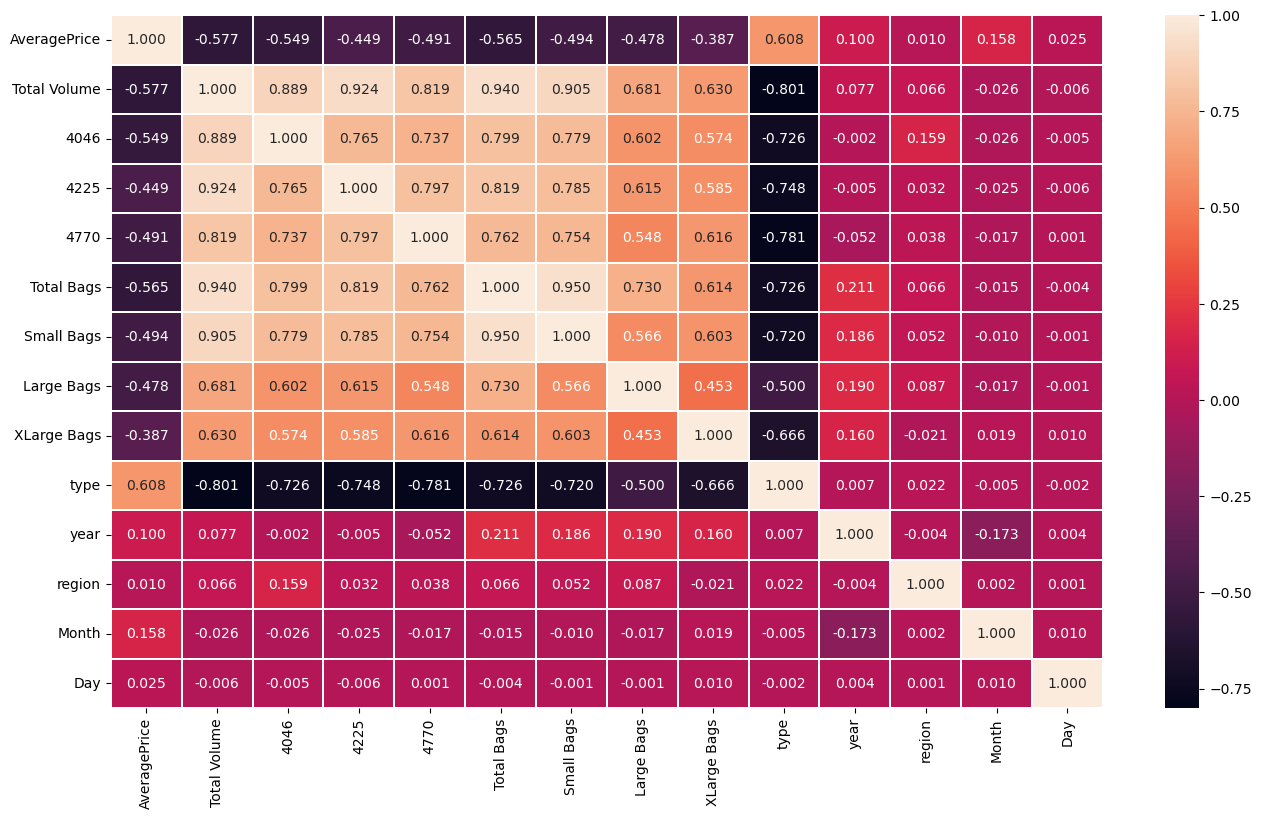

In [54]:
# Visualizing the correlation matrix by plotting heat map.
plt.figure(figsize=(16,9))
sns.heatmap(new_df.corr(),linewidths=.1,fmt='0.3f', annot = True)
plt.yticks(rotation=0)

This heatmap shows the correlation matrix. We can observe the relationship between feature-to-feature and feature-to-label.

This heatmap contains both positive and negative correlations.
The AveragePrice feature has more correlation with type.
The columns Total Volume, 4046, 4225, 4770, Total Bags, Small Bags, Large Bags, and XLarge Bags are highly correlated with each other.

In [55]:
cor['AveragePrice'].sort_values(ascending=False)

AveragePrice    1.000000
type            0.608447
Month           0.157900
year            0.099910
Day             0.024742
region          0.010428
XLarge Bags    -0.387285
4225           -0.448579
Large Bags     -0.477879
4770           -0.491320
Small Bags     -0.493621
4046           -0.548618
Total Bags     -0.564616
Total Volume   -0.576829
Name: AveragePrice, dtype: float64

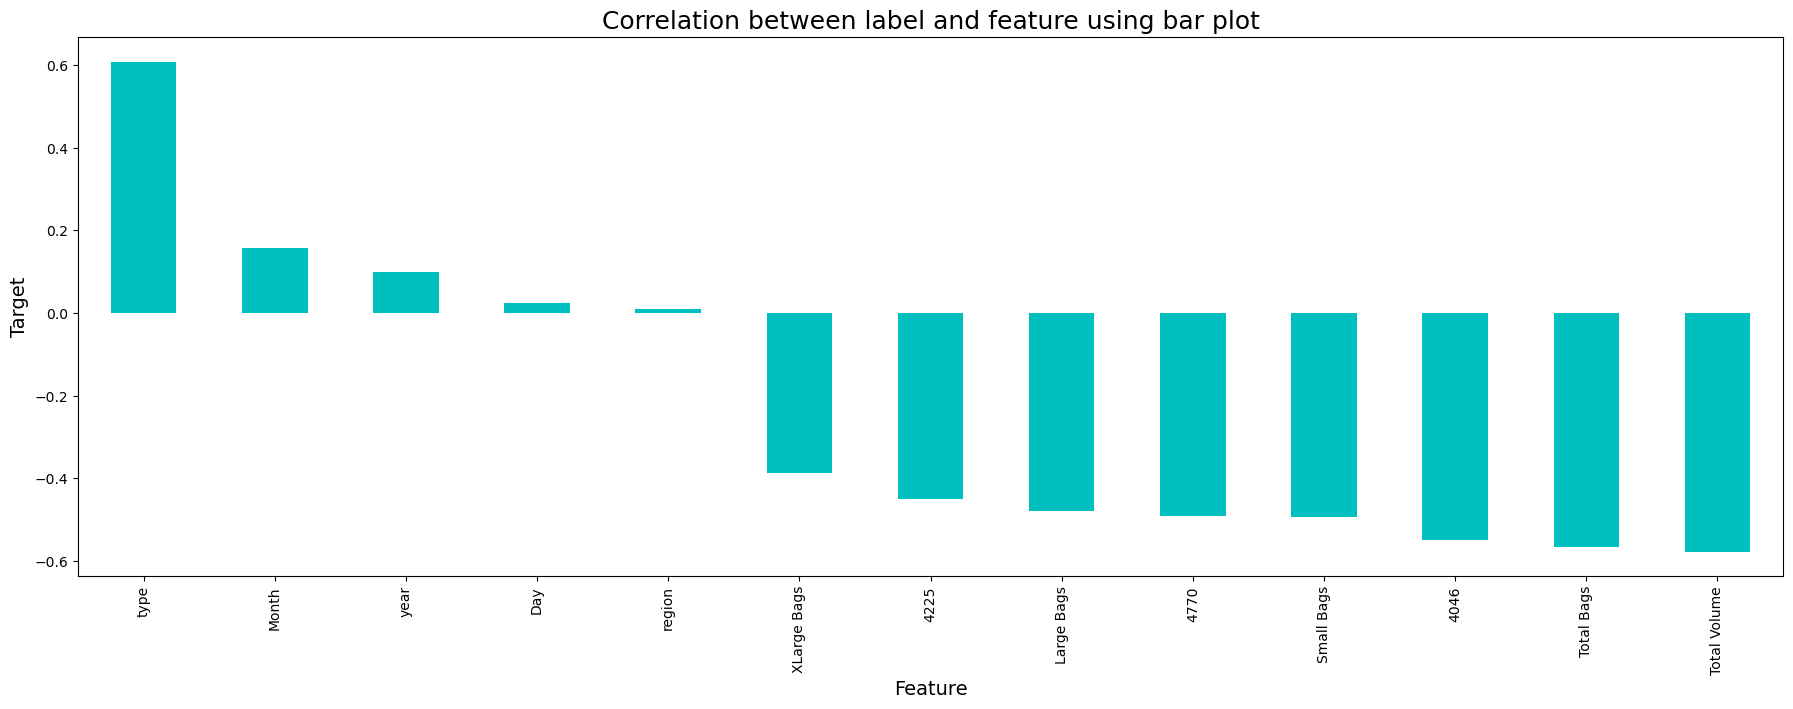

In [56]:
#Bar Chart Visualisation
plt.figure(figsize=(22,7))
new_df.corr()['AveragePrice'].sort_values(ascending=False).drop(['AveragePrice']).plot(kind='bar',color='c')
plt.xlabel('Feature',fontsize=14)
plt.ylabel('Target',fontsize=14)
plt.title('Correlation between label and feature using bar plot',fontsize=18)
plt.show()

In [57]:
#Lets drop day column
new_df.drop("Day",axis=1, inplace=True)

In [58]:
#Regression model predicting the average sales
x = new_df.drop("AveragePrice",axis=1)
y = new_df["AveragePrice"]


In [59]:
x.shape

(17782, 12)

In [60]:
y.shape

(17782,)

In [61]:
x.head()

Total Volume      4046      4225      4770  Total Bags  Small Bags  \
0     -0.065094 -0.649918  0.358278 -0.212550   -0.527445   -0.337064   
1     -0.137269 -0.770067  0.276355 -0.165117   -0.488205   -0.301038   
2      0.215503 -0.724508  0.656010  0.034215   -0.556204   -0.364044   
3      0.029840 -0.625017  0.475615 -0.110976   -0.702370   -0.500341   
4     -0.170456 -0.677083  0.268966 -0.100289   -0.675712   -0.479918   

   Large Bags  XLarge Bags  type  year  region  Month  
0   -0.775214    -0.675702     0  2015       0     12  
1   -0.765237    -0.675702     0  2015       0     12  
2   -0.752534    -0.675702     0  2015       0     12  
3   -0.693012    -0.675702     0  2015       0     12  
4   -0.600755    -0.675702     0  2015       0     11

In [62]:
x.tail()

Total Volume      4046      4225      4770  Total Bags  Small Bags  \
18244     -0.668931 -0.454078 -0.922232 -1.224990   -0.331042   -0.165765   
18245     -0.762380 -0.610403 -0.665649 -1.224990   -0.499550   -0.321645   
18246     -0.766344 -0.610350 -0.774395  0.455355   -0.493424   -0.303466   
18247     -0.692595 -0.539211 -0.711605  0.455045   -0.424475   -0.240252   
18248     -0.658062 -0.351503 -0.787209  0.168008   -0.383676   -0.201685   

       Large Bags  XLarge Bags  type  year  region  Month  
18244   -0.405895    -0.675702     1  2018      53      2  
18245   -0.478556    -0.675702     1  2018      53      1  
18246   -0.945246    -0.675702     1  2018      53      1  
18247   -0.910471    -0.675702     1  2018      53      1  
18248   -1.042930    -0.675702     1  2018      53      1

In [63]:
#Standard Scalarisation
scaler = StandardScaler()
x = pd.DataFrame(scaler.fit_transform(x), columns=x.columns)
x

Total Volume      4046      4225      4770  Total Bags  Small Bags  \
0         -0.065094 -0.649918  0.358278 -0.212550   -0.527445   -0.337064   
1         -0.137269 -0.770067  0.276355 -0.165117   -0.488205   -0.301038   
2          0.215503 -0.724508  0.656010  0.034215   -0.556204   -0.364044   
3          0.029840 -0.625017  0.475615 -0.110976   -0.702370   -0.500341   
4         -0.170456 -0.677083  0.268966 -0.100289   -0.675712   -0.479918   
...             ...       ...       ...       ...         ...         ...   
17777     -0.668931 -0.454078 -0.922232 -1.224990   -0.331042   -0.165765   
17778     -0.762380 -0.610403 -0.665649 -1.224990   -0.499550   -0.321645   
17779     -0.766344 -0.610350 -0.774395  0.455355   -0.493424   -0.303466   
17780     -0.692595 -0.539211 -0.711605  0.455045   -0.424475   -0.240252   
17781     -0.658062 -0.351503 -0.787209  0.168008   -0.383676   -0.201685   

       Large Bags  XLarge Bags      type      year    region     Month  
0       -0.775214    -0.675702 -1.026443 -1.214908 -1.698613  1.641434  
1       -0.765237    -0.675702 -1.026443 -1.214908 -1.698613  1.641434  
2       -0.752534    -0.675702 -1.026443 -1.214908 -1.698613  1.641434  
3       -0.693012    -0.675702 -1.026443 -1.214908 -1.698613  1.641434  
4       -0.600755    -0.675702 -1.026443 -1.214908 -1.698613  1.358706  
...           ...          ...       ...       ...       ...       ...  
17777   -0.405895    -0.675702  0.974238  1.979143  1.742552 -1.185845  
17778   -0.478556    -0.675702  0.974238  1.979143  1.742552 -1.468572  
17779   -0.945246    -0.675702  0.974238  1.979143  1.742552 -1.468572  
17780   -0.910471    -0.675702  0.974238  1.979143  1.742552 -1.468572  
17781   -1.042930    -0.675702  0.974238  1.979143  1.742552 -1.468572  

[17782 rows x 12 columns]

In [64]:
# Finding varience inflation factor in each scaled column i.e, x.shape[1] (1/(1-R2))

vif = pd.DataFrame()
vif["VIF values"] = [variance_inflation_factor(x.values,i)
              for i in range(len(x.columns))]
vif["Features"] = x.columns

# Let's check the values
vif

VIF values      Features
0    52.162466  Total Volume
1     7.156610          4046
2    11.180295          4225
3     3.954800          4770
4    34.507417    Total Bags
5    16.640947    Small Bags
6     3.463321    Large Bags
7     2.053488   XLarge Bags
8     3.718421          type
9     1.386914          year
10    1.086159        region
11    1.053804         Month

The VIF for total volume,4225,total bags,small bags are higher than 10. Lets try to drop the highest VIF value.

In [65]:
# Dropping the feature Total Volume
x.drop("Total Volume",axis=1, inplace=True)

In [66]:
# Againing checking the VIF after removing one column

vif = pd.DataFrame()
vif["VIF values"] = [variance_inflation_factor(x.values,i)
              for i in range(len(x.columns))]
vif["Features"] = x.columns

# Let's check the values
vif

VIF values     Features
0     3.741792         4046
1     4.284469         4225
2     3.940626         4770
3    24.482299   Total Bags
4    16.640691   Small Bags
5     3.421445   Large Bags
6     2.039467  XLarge Bags
7     3.502117         type
8     1.384570         year
9     1.079277       region
10    1.051753        Month

In [67]:
#Removing total bags
x.drop('Total Bags',axis=1,inplace = True)

In [68]:
# Againing checking the VIF after removing one column

vif = pd.DataFrame()
vif["VIF values"] = [variance_inflation_factor(x.values,i)
              for i in range(len(x.columns))]
vif["Features"] = x.columns

# Let's check the values
vif

VIF values     Features
0    3.722981         4046
1    4.139516         4225
2    3.940399         4770
3    4.103561   Small Bags
4    1.866020   Large Bags
5    2.039043  XLarge Bags
6    3.498710         type
7    1.359832         year
8    1.079272       region
9    1.051109        Month

In [69]:
#Dataframe after data cleaning and preprocessing
x.head()

4046      4225      4770  Small Bags  Large Bags  XLarge Bags  \
0 -0.649918  0.358278 -0.212550   -0.337064   -0.775214    -0.675702   
1 -0.770067  0.276355 -0.165117   -0.301038   -0.765237    -0.675702   
2 -0.724508  0.656010  0.034215   -0.364044   -0.752534    -0.675702   
3 -0.625017  0.475615 -0.110976   -0.500341   -0.693012    -0.675702   
4 -0.677083  0.268966 -0.100289   -0.479918   -0.600755    -0.675702   

       type      year    region     Month  
0 -1.026443 -1.214908 -1.698613  1.641434  
1 -1.026443 -1.214908 -1.698613  1.641434  
2 -1.026443 -1.214908 -1.698613  1.641434  
3 -1.026443 -1.214908 -1.698613  1.641434  
4 -1.026443 -1.214908 -1.698613  1.358706

In [70]:
#Model Workout
#Finding best random state
from sklearn.neighbors import KNeighborsRegressor as KNN
maxAccu=0
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.30, random_state=i)
    mod = KNN()
    mod.fit(x_train, y_train)
    pred = mod.predict(x_test)
    acc=r2_score(y_test, pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Maximum r2 score is ",maxAccu," on Random_state ",maxRS)

Maximum r2 score is  0.8738928050407696  on Random_state  49


In [71]:
# Creating train test split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=maxRS)

In [72]:
#Linear regression
# Checking r2score for Linear Regression
LR = LinearRegression()
LR.fit(x_train,y_train)

# prediction
predLR=LR.predict(x_test)
print('R2_score:',r2_score(y_test,predLR))
print('MAE:',metrics.mean_absolute_error(y_test, predLR))
print('MSE:',metrics.mean_squared_error(y_test, predLR))
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test, predLR)))

# Checking cv score for Linear Regression
print("Cross_Validaton_Score",cross_val_score(LR,x,y,cv=5).mean())

R2_score: 0.5148027368068253
MAE: 0.2181570672174418
MSE: 0.08002570178064973
RMSE: 0.2828881435844382
Cross_Validaton_Score 0.08959563657474119


In [73]:
#Random Forest
# Checking R2 score for  Random Forest Regressor
RFR=RandomForestRegressor()
RFR.fit(x_train,y_train)

# prediction
pred_RFR=RFR.predict(x_test)
print('R2_Score:',r2_score(y_test,pred_RFR))

# Mean Absolute Error (MAE)
print('MAE:',metrics.mean_absolute_error(y_test, pred_RFR))

# Mean Squared Error (MSE)
print('MSE:',metrics.mean_squared_error(y_test, pred_RFR))

# Root Mean Squared Error (RMSE)
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test, pred_RFR)))

# Checking cv score for Random Forest Regression
print("Cross_Validaton_Score",cross_val_score(RFR,x,y,cv=5).mean())

R2_Score: 0.8878105056692676
MAE: 0.0955455107778819
MSE: 0.018503902839737584
RMSE: 0.13602905145496524
Cross_Validaton_Score 0.2283142836009234


In [74]:
# Checking R2 score for KNN Regressor
knn=KNN()
knn.fit(x_train,y_train)

# prediction
predknn=knn.predict(x_test)
print('R2_Score:',r2_score(y_test,predknn))
print('MAE:',metrics.mean_absolute_error(y_test, predknn))
print('MSE:',metrics.mean_squared_error(y_test, predknn))
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test, predknn)))

# Checking cv score for KNN
print("Cross_Validaton_Score",cross_val_score(knn,x,y,cv=5).mean())

R2_Score: 0.8738928050407696
MAE: 0.10146841611996252
MSE: 0.0207994099343955
RMSE: 0.14422000531963483
Cross_Validaton_Score -0.017763112021986615


In [75]:
# Checking R2 score for  GradientBoosting Regressor
from sklearn.ensemble import GradientBoostingRegressor
GB=GradientBoostingRegressor()
GB.fit(x_train,y_train)

# prediction
predGB=GB.predict(x_test)
print('R2_Score:',metrics.r2_score(y_test,predGB))
print('MAE:',metrics.mean_absolute_error(y_test, predGB))
print('MSE:',metrics.mean_squared_error(y_test, predGB))
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test, predGB)))

# Checking cv score for GradientBoosting Regressor
print("Cross_Validaton_Score",cross_val_score(GB,x,y,cv=5).mean())

R2_Score: 0.7398410741912826
MAE: 0.15603481890943272
MSE: 0.04290914683921793
RMSE: 0.20714523127317688
Cross_Validaton_Score 0.387236616125593


In [76]:
# Checking R2 score for Support Vector Machine Regressor
svr=SVR()
svr.fit(x_train,y_train)

# prediction
predsvr=svr.predict(x_test)
print('R2_Score:',r2_score(y_test,predsvr))
print('MAE:',metrics.mean_absolute_error(y_test, predsvr))
print('MSE:',metrics.mean_squared_error(y_test, predsvr))
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test, predsvr)))

# Checking cv score for SVR 
print("Cross_Validaton_Score",cross_val_score(svr,x,y,cv=5).mean())

R2_Score: 0.7961260572507086
MAE: 0.1340780496945885
MSE: 0.033625818983245986
RMSE: 0.18337344132465308
Cross_Validaton_Score 0.001851844460551777


In [77]:
#By seeing the results, KNN holds R2 score of 87% .
#lets go on to hyperparameter tuning
parameter = {'n_neighbors':[1,2,3,4],
            'weights':['uniform','distance'],
            'algorithm':['auto','ball_tree','kd_tree','brute'],
            'n_jobs':[10,20,30,40]}


In [78]:
GCV=GridSearchCV(KNN(),parameter,cv=5)

In [79]:
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=KNeighborsRegressor(),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'n_jobs': [10, 20, 30, 40],
                         'n_neighbors': [1, 2, 3, 4],
                         'weights': ['uniform', 'distance']})

In [80]:
GCV.best_params_

{'algorithm': 'auto', 'n_jobs': 10, 'n_neighbors': 3, 'weights': 'distance'}

In [81]:
Final_mod=KNN(algorithm='brute',n_jobs=10,n_neighbors=3,weights='distance')
Final_mod.fit(x_train,y_train)
pred=Final_mod.predict(x_test)
print('R2_Score:',r2_score(y_test,pred)*100)
print('mean_squared_error:',metrics.mean_squared_error(y_test,pred))
print('mean_absolute_error:',metrics.mean_absolute_error(y_test,pred))
print("RMSE value:",np.sqrt(metrics.mean_squared_error(y_test, pred)))

R2_Score: 89.10112316151631
mean_squared_error: 0.01797599314308736
mean_absolute_error: 0.09000034733032741
RMSE value: 0.1340745805254947


In [82]:
#Saving the Model
# Saving the model using .pkl
import joblib
joblib.dump(Final_mod,"Avocado.pkl")

['Avocado.pkl']

In [83]:
# Let's load the saved model and get the prediction

# Loading the saved model
model=joblib.load("Avocado.pkl")

#Prediction
prediction = model.predict(x_test)
prediction

array([1.24655687, 1.83252583, 1.80393428, ..., 1.5860901 , 1.44745067,
       1.33434882])

In [84]:

pd.DataFrame([model.predict(x_test)[:],y_test[:]],index=["Predicted","Original"])

0         1         2         3         4         5     \
Predicted  1.246557  1.832526  1.803934  0.998369  1.195949  1.265884   
Original   1.190000  1.880000  1.820000  1.040000  1.100000  1.280000   

               6         7         8         9     ...      5325      5326  \
Predicted  1.202933  1.559202  1.478156  0.909779  ...  1.210196  1.552959   
Original   1.020000  1.350000  1.410000  0.860000  ...  0.910000  1.560000   

               5327      5328      5329      5330      5331     5332  \
Predicted  1.803169  1.997506  1.499516  1.757493  0.728708  1.58609   
Original   1.730000  2.310000  1.470000  1.660000  0.700000  1.54000   

               5333      5334  
Predicted  1.447451  1.334349  
Original   1.600000  1.410000  

[2 rows x 5335 columns]

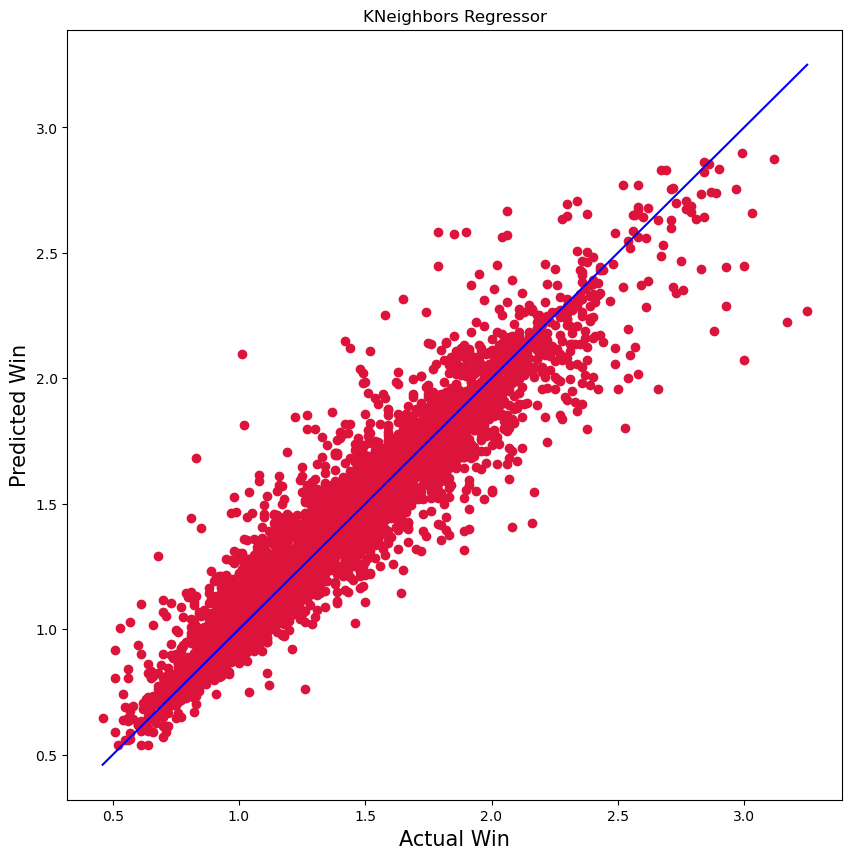

In [85]:
plt.figure(figsize=(10,10))
plt.scatter(y_test, prediction, c='crimson')
plt1 = max(max(prediction), max(y_test))
plt2 = min(min(prediction), min(y_test))
plt.plot([plt1, plt2], [plt1, plt2], 'b-')
plt.title("KNeighbors Regressor")
plt.xlabel('Actual Win', fontsize=15)
plt.ylabel('Predicted Win', fontsize=15)
plt.show()

The blue line represents the actual Average Price of the avocado and scattered points are the predicted preice of the avocado.

In [86]:
#Classification Model Prediction by Region
new_df.head()

AveragePrice  Total Volume      4046      4225      4770  Total Bags  \
0          1.33     -0.065094 -0.649918  0.358278 -0.212550   -0.527445   
1          1.35     -0.137269 -0.770067  0.276355 -0.165117   -0.488205   
2          0.93      0.215503 -0.724508  0.656010  0.034215   -0.556204   
3          1.08      0.029840 -0.625017  0.475615 -0.110976   -0.702370   
4          1.28     -0.170456 -0.677083  0.268966 -0.100289   -0.675712   

   Small Bags  Large Bags  XLarge Bags  type  year  region  Month  
0   -0.337064   -0.775214    -0.675702     0  2015       0     12  
1   -0.301038   -0.765237    -0.675702     0  2015       0     12  
2   -0.364044   -0.752534    -0.675702     0  2015       0     12  
3   -0.500341   -0.693012    -0.675702     0  2015       0     12  
4   -0.479918   -0.600755    -0.675702     0  2015       0     11

In [87]:
#Lets  assign the value of x and y
x_c = new_df.drop(columns=['region'])
y_c = new_df[["region"]]
print(x_c.shape)
print(y_c.shape)


(17782, 12)
(17782, 1)


In [88]:
#Standardize the value of x so that mean will 0 and SD will become 1 , and make the data as normal distributed
sc = StandardScaler()
sc.fit_transform(x_c)
x_c = pd.DataFrame(x_c,columns=x_c.columns)

In [89]:
x_train,x_test,y_train,y_test=train_test_split(x_c,y_c,test_size=.30,random_state=49)

In [90]:
#Logistic Regression
LR=LogisticRegression()
LR.fit(x_train,y_train)
predLR=LR.predict(x_test)

print(accuracy_score(y_test, predLR))
print(confusion_matrix(y_test, predLR))
print(classification_report(y_test,predLR))

0.2028116213683224
[[37  0  0 ...  0  0  0]
 [ 0 19  0 ...  0  0  0]
 [ 0  0 17 ...  0  0  0]
 ...
 [ 0  0  0 ...  0  1  0]
 [ 0  1  0 ... 18  8  0]
 [ 0  4  4 ...  0  2  7]]
              precision    recall  f1-score   support

           0       0.22      0.32      0.26       114
           1       0.10      0.22      0.13        88
           2       0.15      0.19      0.17        90
           3       0.08      0.06      0.07       102
           4       0.12      0.11      0.11       102
           5       0.04      0.06      0.05       101
           6       0.28      0.34      0.31        85
           7       0.32      0.62      0.42        93
           8       0.42      0.40      0.41       112
           9       0.28      0.37      0.32        98
          10       0.15      0.21      0.17        99
          11       0.20      0.20      0.20       107
          12       0.12      0.24      0.16       107
          13       0.00      0.00      0.00        88
          14  

In [91]:
#Decision Tree Classifier
DTC = DecisionTreeClassifier()
DTC.fit(x_train,y_train)
predDTC = DTC.predict(x_test)

print(accuracy_score(y_test, predDTC))
print(confusion_matrix(y_test, predDTC))
print(classification_report(y_test,predDTC))

0.7851921274601686
[[86  0  0 ...  0  0  0]
 [ 0 55  0 ...  0  0  3]
 [ 0  0 81 ...  0  0  1]
 ...
 [ 0  0  0 ... 59  0  0]
 [ 0  0  0 ...  1 68  0]
 [ 0  2  2 ...  0  0 62]]
              precision    recall  f1-score   support

           0       0.74      0.75      0.75       114
           1       0.62      0.62      0.62        88
           2       0.81      0.90      0.85        90
           3       0.78      0.78      0.78       102
           4       0.82      0.85      0.84       102
           5       0.65      0.71      0.68       101
           6       0.95      0.91      0.93        85
           7       0.83      0.85      0.84        93
           8       0.90      0.90      0.90       112
           9       0.74      0.77      0.75        98
          10       0.67      0.63      0.65        99
          11       0.83      0.87      0.85       107
          12       0.89      0.87      0.88       107
          13       0.66      0.67      0.67        88
          14  

In [92]:
#Support Vector Machine Classifier
svc = SVC()
svc.fit(x_train,y_train)
predsvc = svc.predict(x_test)

print(accuracy_score(y_test, predsvc))
print(confusion_matrix(y_test, predsvc))
print(classification_report(y_test,predsvc))

0.015745079662605434
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       114
           1       0.00      0.00      0.00        88
           2       0.00      0.00      0.00        90
           3       0.00      0.00      0.00       102
           4       0.00      0.00      0.00       102
           5       0.00      0.00      0.00       101
           6       0.00      0.00      0.00        85
           7       0.00      0.00      0.00        93
           8       0.00      0.00      0.00       112
           9       0.00      0.00      0.00        98
          10       0.00      0.00      0.00        99
          11       0.00      0.00      0.00       107
          12       0.00      0.00      0.00       107
          13       0.00      0.00      0.00        88
          14       0.00      0.00      0.00     

In [93]:
#Gradient boosting Classifier
GB = GradientBoostingClassifier()
GB.fit(x_train,y_train)
predGB = GB.predict(x_test)

print(accuracy_score(y_test, predGB))
print(confusion_matrix(y_test, predGB))
print(classification_report(y_test,predGB))

0.8279287722586691
[[95  0  0 ...  0  0  0]
 [ 0 50  0 ...  0  0  2]
 [ 0  0 84 ...  0  0  1]
 ...
 [ 0  0  0 ... 58  1  0]
 [ 0  0  0 ...  0 71  0]
 [ 0  1  2 ...  0  0 68]]
              precision    recall  f1-score   support

           0       0.77      0.83      0.80       114
           1       0.63      0.57      0.60        88
           2       0.92      0.93      0.93        90
           3       0.82      0.74      0.78       102
           4       0.89      0.86      0.88       102
           5       0.74      0.74      0.74       101
           6       0.99      0.94      0.96        85
           7       0.86      0.89      0.87        93
           8       0.99      0.95      0.97       112
           9       0.85      0.86      0.85        98
          10       0.70      0.70      0.70        99
          11       0.88      0.85      0.87       107
          12       0.91      0.91      0.91       107
          13       0.70      0.78      0.74        88
          14  

In [94]:
# cv score for Decision Tree Classifier
print(cross_val_score(DTC,x_c,y_c,cv=5).mean())

# cv score for Logistic Regression 
print(cross_val_score(LR,x_c,y_c,cv=5).mean())

# cv score for Support Vector  Classifier
print(cross_val_score(svc,x_c,y_c,cv=5).mean())

# cv score for Gradient Boosting Classifier
print(cross_val_score(GB,x_c,y_c,cv=5).mean())

0.5353682420285037
0.1219220928140238
0.02266310224013677
0.5958800483085523


After our modelling results, we will choose Gradient Boosting Classifier as the performing model.

In [95]:
#Hyperparameter tuning for the chosen model -GB Classifier
parameters = {'n_estimators':[100],
             'max_leaf_nodes':[3,5]}

In [96]:
GCV=GridSearchCV(GradientBoostingClassifier(),parameters,cv=5)

In [97]:
%%time
GCV.fit(x_train,y_train)

CPU times: user 23min 55s, sys: 16.6 s, total: 24min 12s
Wall time: 24min 16s


GridSearchCV(cv=5, estimator=GradientBoostingClassifier(),
             param_grid={'max_leaf_nodes': [10, 20], 'n_estimators': [100]})

In [98]:
GCV.best_params_

{'max_leaf_nodes': 20, 'n_estimators': 100}

In [100]:
Region = GradientBoostingClassifier( max_leaf_nodes=20, n_estimators=100)
Region.fit(x_train, y_train)
pred = Region.predict(x_test)
acc=accuracy_score(y_test,pred)
print(acc*100)

83.0178069353327


In [102]:
#The model gives 83% accuracy.
# Saving the model using .pkl
import joblib
joblib.dump(Region,"Region.pkl")

['Region.pkl']

In [103]:
print("End of the model selection and training")

End of the model selection and training
